<h1 style="text-align:center; color:red">Importing Libraries</h1>

In [3503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

<h1 style="text-align:center; color:red">Dataset Information</h1>

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. 

Source: Kaggle

Owner: Open Sourcing Mental Illness, LTD

Link: [Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)

<div> </div>

Content:

This dataset contains the following data:

* `Timestamp`

* `Age`

* `Gender`

* `Country`

* `state`: If you live in the United States, which state or territory do you live in?

* `self_employed`: Are you self-employed?

* `family_history`: Do you have a family history of mental illness?

* `treatment`: Have you sought treatment for a mental health condition?

* `work_interfere`: If you have a mental health condition, do you feel that it interferes with your work?

* `no_employees`: How many employees does your company or organization have?

* `remote_work`: Do you work remotely (outside of an office) at least 50% of the time?

* `tech_company`: Is your employer primarily a tech company/organization?

* `benefits`: Does your employer provide mental health benefits?

* `care_options`: Do you know the options for mental health care your employer provides?

* `wellness_program`: Has your employer ever discussed mental health as part of an employee wellness program?

* `seek_help`: Does your employer provide resources to learn more about mental health issues and how to seek help?

* `anonymity`: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

* `leave`: How easy is it for you to take medical leave for a mental health condition?

* `mental_health_consequence`: Do you think that discussing a mental health issue with your employer would have negative consequences?

* `phys_health_consequence`: Do you think that discussing a physical health issue with your employer would have negative consequences?

* `coworkers`: Would you be willing to discuss a mental health issue with your coworkers?

* `supervisor`: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

* `mental_health_interview`: Would you bring up a mental health issue with a potential employer in an interview?

* `phys_health_interview`: Would you bring up a physical health issue with a potential employer in an interview?

* `mental_vs_physical`: Do you feel that your employer takes mental health as seriously as physical health?

* `obs_consequence`: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

* `comments`: Any additional notes or comments

<h1 style="text-align:center; color:red">Inspecting the Data</h1>

* Reading the data and parsing the `Timestamp` variable

In [3504]:
df = pd.read_csv("survey.csv", parse_dates=["Timestamp"])
print(df["Timestamp"].dtype)  # datetime64[ns] if it worked

datetime64[ns]


* Inspecting the data

In [3505]:
df.head(n=10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


<h1 style="text-align:center;color:red">Checking shape, missing values, and unique values</h1>

* Inspecting the shape of the data

In [3506]:
df.shape

(1259, 27)

* Inspecting missingness in the data

In [3507]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

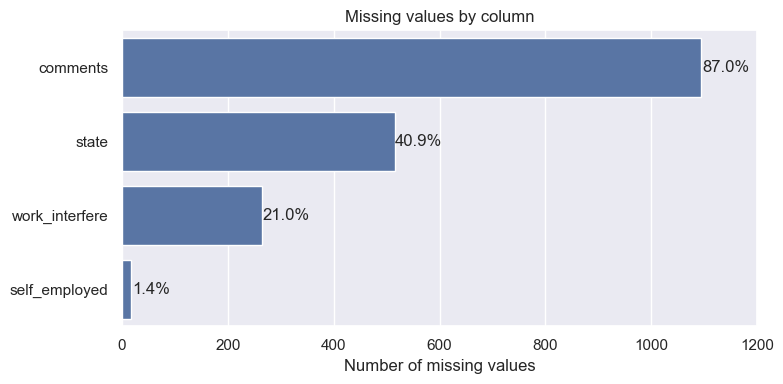

In [3508]:
# 1) Missing counts (+ percent for annotation)
miss_cnt = df.isna().sum().rename("n_missing")
miss_pct = (df.isna().mean()*100).rename("pct_missing")

# 1) Missing counts (+ percent for annotation)
miss = (
    pd.concat([miss_cnt, miss_pct], axis=1)
      .reset_index(names="column")
      .query("n_missing > 0")                     # drop columns with 0 missing
      .sort_values("n_missing", ascending=False)  # largest first
)

# 2) Plot
plt.figure(figsize=(8, max(4, 0.35*len(miss))))
g = sns.barplot(data=miss, x="n_missing", y="column", orient="h")
g.set(
    title="Missing values by column",
    xlabel="Number of missing values",
    ylabel="",
    xlim=(0,1200)
)

# 3) Annotate % missing
for i, (cnt, pct) in enumerate(zip(miss["n_missing"], miss["pct_missing"])):
    g.text(cnt + 1, i, f"{pct:.1f}%", va="center")

plt.tight_layout()
plt.show()

#### Checking unique values of `benefits`, `care_options`, `seek_helo`, and `anonymity` variables

* These variables will be used to construct feature(s) that measures the level of support an employee receives

In [3509]:
print(df["benefits"].unique()) # Does your employer provide mental health benefits?
print(df["care_options"].unique()) # Do you know the options for mental health care your employer provides?
print((df["seek_help"].unique())) # Does your employer provide resources to learn more about mental health issues and how to seek help?
print(df["anonymity"].unique()) # Does your employer provide resources to learn more about mental health issues and how to seek help?
print(df["wellness_program"].unique()) # Has your employer ever discussed mental health as part of an employee wellness program?

['Yes' "Don't know" 'No']
['Not sure' 'No' 'Yes']
['Yes' "Don't know" 'No']
['Yes' "Don't know" 'No']
['No' "Don't know" 'Yes']


<span style="color:pink">Note: feature values are uniform and clean, requiring no further cleaning</span>

#### Checking unique values of `mental_health_consequence`, `phys_health_consequence`, `mental_health_interview`, and `phys_health_interview` variables

* These variables will be used to construct feature(s) that measures the level of stigma an employee experiences

In [3510]:
print(df["mental_health_consequence"].unique()) # Do you think that discussing a mental health issue with your employer would have negative consequences?
print(df["phys_health_consequence"].unique()) # Do you think that discussing a physical health issue with your employer would have negative consequences?
print((df["mental_health_interview"].unique())) # Would you bring up a mental health issue with a potential employer in an interview?
print(df["phys_health_interview"].unique()) # Would you bring up a physical health issue with a potential employer in an interview?

['No' 'Maybe' 'Yes']
['No' 'Yes' 'Maybe']
['No' 'Yes' 'Maybe']
['Maybe' 'No' 'Yes']


<span style="color: pink">Note: feature values are uniform and clean, requiring no further cleaning</span>

In [3511]:
%pip install -q wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3512]:
df["remote_work"].value_counts()

remote_work
No     883
Yes    376
Name: count, dtype: int64

<h1 style="text-align:center; color:red">Feature Engineering</h1>

## <span style="color:magenta"> 0. Defining lookup dictionaries (what to turn each string into)</span>

`support_map`:
* Creates a dictionary that maps text answers to numbers.
* Here, any “supportive” answer ("yes") becomes 1. Everything else becomes 0.

`consequence_map`:
* Another dictionary for a different kind of question.
* Saying Yes/Maybe to “negative consequences” = more stigma → code as 1.
* Saying No = no stigma → 0.

`willingness_map`:
* For “would you discuss?” questions:
* Yes (willing) = 0 (not unfavorable),
* Maybe/No (reluctance) = 1 (unfavorable).

In [3513]:
# Policies/visibility (supportive = 1)
support_map = {"Yes": 1, "No": 0, "Don't know":0, "Not sure": 0}

# 2) Negative consequence items (stigma = 1)
# e.g., "Do you think discussing mental health could have negative consequences?"
consequence_map = {"Yes": 1, "Maybe": 1, "No": 0}

# 3) Willingness/comfort items (unfavorable reluctance = 1)
# e.g., "Would you bring up a mental health issue with your employer?"
willingness_map = {"Yes": 0, "Maybe": 1, "No": 1}

## <span style="color:magenta"> 1. Building a support score (0-5)</span>

* `.map(support_map)` → convert strings to 0/1 using the dictionary.
* `.fillna(0)` → if a value didn’t match (missing or unexpected text), treat it as 0.
* Repeat for four policy columns, then add them together.
* Result: `support_score` is 0–5 (how many supportive policies a person reports).

In [3514]:
# support_score indicates the level of support an employee receives (higher is better)
df['support_score'] = (
    df["benefits"].map(support_map).fillna(0) + # benefits: Does your employer provide mental health benefits?
    df["care_options"].map(support_map).fillna(0) + # care_options: Do you know the options for mental health care your employer provides?
    df["seek_help"].map(support_map).fillna(0) + # seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
    df["anonymity"].map(support_map).fillna(0) + # anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
    df["wellness_program"].map(support_map).fillna(0) # wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
)

* Confirming the distribution of the `support_score` within the sample

In [3515]:
# Check the distributions
df["support_score"].value_counts(dropna=False).sort_index()

support_score
0    517
1    251
2    203
3    115
4     92
5     81
Name: count, dtype: int64

In [3516]:
# See the first few rows of what got produced
df[["benefits","care_options","seek_help","anonymity","support_score"]].head()

,benefits,care_options,seek_help,anonymity,support_score
0,Yes,Not sure,Yes,Yes,3
1,Don't know,No,Don't know,Don't know,0
2,No,No,No,Don't know,0
3,No,Yes,No,No,1
4,Yes,No,Don't know,Don't know,1


## <span style="color:magenta"> 2. Building a stigma index (0-4)</span>

* Same idea: map → fill missing with 0 → sum.
* Combines two “consequence” items and two “willingness” items into one score.
* Larger number = more stigma/reluctance overall.

In [3517]:
# stigma_index indicates the level of stigma an employee encounters (higher is worse)
df['stigma_index'] = (
    df['mental_health_consequence'].map(consequence_map).fillna(0) + # mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
    df['phys_health_consequence'].map(consequence_map).fillna(0) + # phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
    df['mental_health_interview'].map(willingness_map).fillna(0) + # mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
    df['phys_health_interview'].map(willingness_map).fillna(0) # phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
)

* Confirming the distribution of the `stigma_index` within the sample

In [3518]:
df["stigma_index"].value_counts(dropna=False).sort_index()

stigma_index
0     32
1     71
2    469
3    382
4    305
Name: count, dtype: int64

## <span style="color:magenta"> 3. Building parity gap features (mental vs physical)</span>

#### 1. Consequence parity gap

* Take the coded mental consequence score minus the physical one.
* Positive result → mental health is treated worse than physical (more “yes/maybe” to negative consequences for mental).

In [3519]:
df["parity_gap_consequence"] = (
    df["mental_health_consequence"].map(consequence_map).fillna(0) - # mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
    df["phys_health_consequence"].map(consequence_map).fillna(0) # phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
)

In [3520]:
df["parity_gap_consequence"].unique()

array([ 0,  1, -1])

* Converting the `parity_gap_consequence` to categorical for plotting

In [3521]:
from pandas.api.types import CategoricalDtype

gap_label = {-1: "Physical safer", 0: "No gap", 1: "Mental worse"}
order_lbl = ["Physical safer", "No gap", "Mental worse"]
gap_dtype = CategoricalDtype(order_lbl, ordered=True)

# Consequence gap: numeric -> labels -> ordered categorical
s = pd.to_numeric(df["parity_gap_consequence"], errors="coerce")
s = s.map(gap_label)
df["parity_gap_consequence_cat"] = s.astype(gap_dtype)



<span style="color: pink">Values must match exactly `(-1, 0, 1)`. Anything else becomes `NaN`. However, since there is no `NaN`s, we don't have to assign a category to them. However, If you ever want an explicit “Unknown” bucket, add it to the dtype and fill:</span>

In [3522]:

# Keep this commented out
# add at dtype definition time
# gap_dtype_unknown = CategoricalDtype(order_lbl + ["Unknown"], ordered=True)

# s = pd.to_numeric(df["parity_gap_consequence"], errors="coerce").map(gap_label)
# df["parity_gap_consequence_cat"] = s.fillna("Unknown").astype(gap_dtype_unknown)
# or: s.astype(gap_dtype_unknown).cat.add_categories(["Unknown"]).fillna("Unknown")

#### 2. Willingness parity gap

* Same idea for willingness to discuss in interviews.
* Positive result → more reluctance to discuss mental vs physical health.


In [3523]:
df["parity_gap_interview"] = (
    df["mental_health_interview"].map(willingness_map).fillna(0) -
    df["phys_health_interview"].map(willingness_map).fillna(0) 
)

In [3524]:
df["parity_gap_interview"].unique()

array([ 0,  1, -1])

* Converting the `parity_gap_interview` to categorical for plotting

In [3525]:
gap_label = {-1: "Physical safer", 0: "No gap", 1: "Mental worse"}
order_lbl = ["Physical safer", "No gap", "Mental worse"]
gap_dtype = CategoricalDtype(order_lbl, ordered=True)

# Interview gap: numeric -> labels -> ordered categorical
s = pd.to_numeric(df["parity_gap_interview"], errors="coerce")
s = s.map(gap_label)
df["parity_gap_interview_cat"] = s.astype(gap_dtype)


* Inspecting the distribution of the `parity_gap_consequence_cat` and `parity_gap_interview_cat` features within the population

In [3526]:
# (optional) quick checks
print(df["parity_gap_consequence_cat"].value_counts(dropna=False))
print(df["parity_gap_interview_cat"].value_counts(dropna=False))

parity_gap_consequence_cat
No gap            808
Mental worse      443
Physical safer      8
Name: count, dtype: int64
parity_gap_interview_cat
No gap            1095
Mental worse       161
Physical safer       3
Name: count, dtype: int64


* Checking the correlation between parity gaps to potentially create a new composite feature

In [3527]:
rho = df["parity_gap_consequence"].corr(df["parity_gap_interview"], method="pearson")

print(rho)

0.09802002821737697


<span style="color: pink"> Since the correlation coefficient is low, these two features will be kept separate.</span>

## <span style="color:magenta">4. Creating work interference severity score</span>

In [3528]:
df['work_interfere'].unique() # work interference: If you have a mental health condition, do you feel that it interferes with your work?

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [3529]:
wi_order = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3} # leave missing values as a separate category 
df["work_interfere_sev"] = df["work_interfere"].map(wi_order)

## <span style="color:magenta"> 5. Reviewing `Gender` column values and normalizing </span>

In [3530]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

***Tiny regex cheat-sheet for this function***

* `\b` — word boundary. Prevents matching “male” inside “female”.
* `|` — OR. Example: male|man matches either.
* `.` — any single character (except newline).
* `.*` — zero or more of any character → “anything in between”.
* `.?` — zero or one character → optional separator (e.g., hyphen or space).
* `re.search(pattern, s)` — finds the first match anywhere in the string.

In [3531]:
import re

# Defining a function that takes one cell from Gender and returns a clean label (string).

def clean_gender(val: object) -> str:
    if pd.isna(val):
        return "Unknown/Other"
    
    s = str(val).strip().casefold()

    fixes = {
        "f": "female", "m": "male",
        "female": "female", "femake": "female", "femail": "female",
        "male": "male", "maile": "male", "mal": "male", "malr":"male", "msle": "male", "mail": "male", "make": "male", 
        "cis female": "cis female", "cis-female/femme": "cis female",
        "cis male": "cis male", "male (cis)": "cis male",
        "trans female": "trans female", "female (trans)": "trans female", "trans woman": "trans female"
    }

    s = fixes.get(s, s) # looks up s in the dict; if not found, it keeps s unchanged

    if s in {"", "nah", "all", "p", "a little about you"}:
        return "Unknown/Other"
    
    # building boolean flags with regex

    has_trans = bool(re.search(r"\btrans", s)) # \b would boundry, matching words beginning with "trans", bool() converts to True/False
    has_male = bool(re.search(r"\bmale\b|\bman\b|guy|-ish.*male", s)) # \bmale\b and \bmman\b(whole male and man words), “-ish” followed by any characters (.*) then “male”
    has_female = bool(re.search(r"\bfemale\b|\bwoman\b", s))
    has_nb = bool(re.search("non.?binary|enby|genderqueer|agender|androgyne|androgyn|fluid|neuter", s)) # “non” + optional char (.?) + “binary”, so it matches nonbinary and non-binary, NB/GNC terms: enby, genderqueer, agender, androgyne, fluid, neuter


    she_they = "she/they" in s or "they/she" in s 
    kinda_male = "something kinda male" in s 
    if she_they or kinda_male: # Non-regex string checks for patterns we want to treat as non-binary/GNC signals
        has_nb = True

    if has_trans and has_male: # they mention “trans” and male term, classify as Trans man
        return "Trans man"
    if has_trans and has_female: # they mention “trans” and female term, classify as Trans woman
        return "Trans woman"
    
    if has_nb:
        return "Non-binary_GNC" # catch non-binary/gender-nonconforming identities
    
    if "cis female" in s or (has_female and not has_male):
        return "Woman"
    
    if "cis male" in s or (has_male and not has_female):
        return "Man"

    if has_female and has_male: # mixed signals → treat as GNC
        return "Non-binary_GNC"
    
    else:
        return "Unknown/Other"

#### Applying `clean_gender()` function to the `Gender` column

In [3532]:
df["gender_5"] = df["Gender"].apply(clean_gender)

df["gender_3"] = df["gender_5"].replace({"Trans woman": "Woman", "Trans man": "Man"})

In [3533]:
print(df["gender_5"].value_counts(dropna=False))
print(df["gender_3"].value_counts(dropna=False))

gender_5
Man               993
Woman             247
Non-binary_GNC     10
Unknown/Other       5
Trans woman         4
Name: count, dtype: int64
gender_3
Man               993
Woman             251
Non-binary_GNC     10
Unknown/Other       5
Name: count, dtype: int64


In [3534]:
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [3535]:
df["Age"].dtype

dtype('int64')

## <span style="color:magenta">6. Creating a categorical `Age` variable: `age_cat`</span

* Building a boolean Series that’s True for outliers:
    * `.lt(18)` means “less than 18” (same as age < 18).
    * `.gt(80)` means “greater than 80” (same as age > 80).
    * `|` is the element-wise OR for boolean Series.
* Result: True where age is <18 or >80, else False.

#### Ensuring `Age` variable is numeric before binning

In [3536]:
age = pd.to_numeric(df["Age"], errors="coerce")

#### Defining the outliers

* Saving the `outlier` flag in `df` to filter or describe outliers later

In [3537]:
outlier = age.lt(18)| age.gt(80)

df["age_outlier"] = outlier

#### Creating `age_cat` binned variable 

In [3538]:
bins   = [0, 25, 35, 45, np.inf]
labels = ["<25", "25–34", "35–44", "45+"]

age_cat = df["age_cat"] = pd.cut(
    age.where(~outlier),
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

* Confirming `age_cat`'s data type and, categories, and missing values

In [3539]:
print(age_cat.dtype)
print(age_cat.cat.categories) 
print(age_cat.isna())           

category
Index(['<25', '25–34', '35–44', '45+'], dtype='object')
0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Name: Age, Length: 1259, dtype: bool


#### Adding two categories (`"Unknown"` `"Outlier"`) to the `age_cat` to annotate the `NaN`s

Because `NaN` isn’t a category, we need to add two new categories ("Unknown" and "Outlier") to `df["age_cat"]` to specify the `NaN`

In [3540]:
age_cat = age_cat.cat.add_categories(["Unknown", "Outlier"])
age_cat[age_cat.isna()] = "Unknown"
age_cat[outlier] = "Outlier"

df["age_cat"] = age_cat

df["age_cat"]

0       35–44
1       35–44
2       25–34
3       25–34
4       25–34
        ...  
1254    25–34
1255    25–34
1256    25–34
1257      45+
1258    25–34
Name: age_cat, Length: 1259, dtype: category
Categories (6, object): ['<25' < '25–34' < '35–44' < '45+' < 'Unknown' < 'Outlier']

## <span style="color:magenta">7. Cleaning `no_employees` and creating `company_size` (and related additional features)</span>

In [3541]:
df["no_employees"].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

#### Creating an ordered categorical variable for company size

In [3542]:
norm = lambda s: s.astype("string").str.strip().str.casefold()

raw = norm(df["no_employees"])

raw = (raw
       .str.replace("\u2013", "-", regex=False)   # en dash –
       .str.replace("\u2014", "-", regex=False))  # em dash —

cat_map = {
    "1-5": "1-5",
    "6-25": "6-25",
    "26-100": "26-100",
    "100-500": "100-500",
    "500-1000": "500-1000",
    "1000+": "1000+",
    "more than 1000": "1000+"
}

df["company_size_cat"] = raw.map(cat_map) # unmatched ware labelled as NaN

order = ["1-5","6-25","26-100","100-500","500-1000","1000+","Unknown"]

df["company_size_cat"] = (df["company_size_cat"]
                             .fillna("Unknown")
                             .astype(pd.CategoricalDtype(order, ordered=True))
)

cat_map2 = {
    "1-5": "≤100",
    "6-25": "≤100",
    "26-100": "≤100",
    "100-500": "100-500",
    "500-1000": "≥500",
    "1000+": "≥500",
    "more than 1000": "≥500"
}

df["company_size_cat2"] = raw.map(cat_map2)

order2 = ["≤100", "100-500", "≥500"]

df["company_size_cat2"] = (df["company_size_cat2"]
                               .fillna("Unknown")
                               .astype(CategoricalDtype(categories=order2, ordered=True))
)

#### Creating an ordinal variable for company size

In [3543]:
ord_map = {"1-5": 0, "6-25": 1, "26-100": 2, "100-500":3, "500-1000": 4, "1000+": 5, "Unknown":pd.NA}

df["company_size_ord"] = df["company_size_cat"].map(ord_map).astype("Int64")

##### Confirming successful creation of `company_size_cat` feature

In [3544]:
print(df["company_size_cat"].value_counts(dropna=False))

company_size_cat
6-25        290
26-100      289
1000+       282
100-500     176
1-5         162
500-1000     60
Unknown       0
Name: count, dtype: int64


<span style="color: pink">Since there is no `"Unknown"` category, we'll remove it. This will come in handy when plotting</span>

In [3545]:
df["company_size_cat"] = df["company_size_cat"].cat.remove_unused_categories()

##### Confirming successful creating of `company_size_ord` feature

In [3546]:
print(df["company_size_ord"].value_counts(dropna=False))

company_size_ord
1    290
2    289
5    282
3    176
0    162
4     60
Name: count, dtype: Int64


In [3547]:
print(df[["no_employees","company_size_cat","company_size_ord"]].head())

     no_employees company_size_cat  company_size_ord
0            6-25             6-25                 1
1  More than 1000            1000+                 5
2            6-25             6-25                 1
3          26-100           26-100                 2
4         100-500          100-500                 3


## <span style="color:magenta">8. Creating Manager/Coworker Comfort features</span>

In [3548]:
print(df["supervisor"].unique())
print(df["coworkers"].unique())

['Yes' 'No' 'Some of them']
['Some of them' 'No' 'Yes']


#### 1. Creating two ordered categorial variable (for plotting): supervisor or coworkers comfort

In [3549]:
order={"Yes", "Some of them", "No"}
df["comfort_supervisor_cat"] = df["supervisor"].astype(pd.CategoricalDtype(categories= order,ordered=True))
df["comfort_coworkers_cat"] = df["coworkers"].astype(pd.CategoricalDtype(categories= order,ordered=True))

 <div class="alert alert-info">
<b>Note:</b> Values must match exactly `("Yes", "No", "Some of them")`. Anything else becomes `NaN`. However, since there is no `NaN`s, we don't have to assign a category to them. However, If you ever want an explicit “Unknown” bucket, add it to the dtype and fill:
</div>

In [3550]:
# Keep this commented out

# comfort_dtype2 = CategoricalDtype(order + ["Unknown"], ordered=True)
# df["comfort_supervisor_cat"] = (
#     df["supervisor"].where(df["supervisor"].isin(order), "Unknown").astype(comfort_dtype2)
# )

# comfort_dtype2 = CategoricalDtype(order + ["Unknown"], ordered=True)
# df["comfort_coworkers_cat"] = (
#     df["coworkers"].where(df["coworkers"].isin(order), "Unknown").astype(comfort_dtype2)
#)

In [3551]:
print(df["comfort_supervisor_cat"].dtype)
print(df["comfort_supervisor_cat"].cat.categories)
print(df["comfort_supervisor_cat"].value_counts(dropna=False))

category
Index(['Yes', 'Some of them', 'No'], dtype='object')
comfort_supervisor_cat
Yes             516
No              393
Some of them    350
Name: count, dtype: int64


In [3552]:
print(df["comfort_coworkers_cat"].dtype)
print(df["comfort_coworkers_cat"].cat.categories)
print(df["comfort_coworkers_cat"].value_counts(dropna=False))

category
Index(['Yes', 'Some of them', 'No'], dtype='object')
comfort_coworkers_cat
Some of them    774
No              260
Yes             225
Name: count, dtype: int64


#### 2. Creating two ordinal variables: supervisor or coworkers comfort

In [3553]:
ord3 = {"No": 0, "Some of them": 1, "Yes": 2}
df["comfort_supervisor_ord3"] = df["supervisor"].map(ord3).astype("Int64")
df["comfort_coworkers_ord3"] = df["coworkers"].map(ord3).astype("Int64")

In [3554]:
print(df["comfort_supervisor_ord3"].dtype)
print(df["comfort_supervisor_ord3"].value_counts(dropna=False))

Int64
comfort_supervisor_ord3
2    516
0    393
1    350
Name: count, dtype: Int64


In [3555]:
print(df["comfort_coworkers_ord3"].dtype)
print(df["comfort_coworkers_ord3"].value_counts(dropna=False))

Int64
comfort_coworkers_ord3
1    774
0    260
2    225
Name: count, dtype: Int64


#### 3. Creating a binary variable for any comfort

In [3556]:
df["comfort_any_bin"] = (
    (df["comfort_supervisor_ord3"].fillna(0)>0) |
    (df["comfort_coworkers_ord3"].fillna(0)>0)
).astype("Int64")

In [3557]:
print(df["comfort_any_bin"].dtype)
print(df["comfort_any_bin"].value_counts(dropna=False))

Int64
comfort_any_bin
1    1060
0     199
Name: count, dtype: Int64


#### 4. Creating an ordinal variable for total comfort

In [3558]:
df["comfort_total_ord4"] = (
    df["comfort_supervisor_ord3"].fillna(9) +
    df["comfort_coworkers_ord3"].fillna(9)
).astype("Int64")

In [3559]:
print(df["comfort_total_ord4"].dtype)
print(df["comfort_total_ord4"].value_counts(dropna=False))

Int64
comfort_total_ord4
3    332
2    297
1    236
0    199
4    195
Name: count, dtype: Int64


## <span style="color:magenta">9. Creating `us_category` feature</span>

* Checking the unique values of the `Country` column

In [3560]:
df["Country"].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

<span style="color: pink">Note: the values are clean and uniform, requiring no further cleaning.</span>

* Checking the unique values of the `Country` column

In [3561]:
df["state"].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

<span style="color: pink">Note-1: the values are clean and uniform, requiring no further cleaning.</span>

<span style="color: pink">Note-2: It's likely that only `United States` has `state` values available.</span>

#### Creating the `us_category` feature

In [3562]:
country = df["Country"].astype("string").str.strip()

us_cat = country.map({"United States": "US"}).fillna("Non-US")   # map US, others -> NaN, then NaN -> 'Non-US'
us_cat = us_cat.mask(country.isna(), "Unknown") # true missing -> 'Unknown'

dtype = us_cat.astype(pd.CategoricalDtype(categories=["US", "Non-US", "Unknown"]))

df["us_category"] = dtype

* Inspecting the distribution of the `us_category` to confirm accurate creation

In [3563]:
print(df['us_category'].value_counts(dropna=False))

us_category
US         751
Non-US     508
Unknown      0
Name: count, dtype: int64


<h1 style="text-align:center; color:red">Visual Insights</h1>

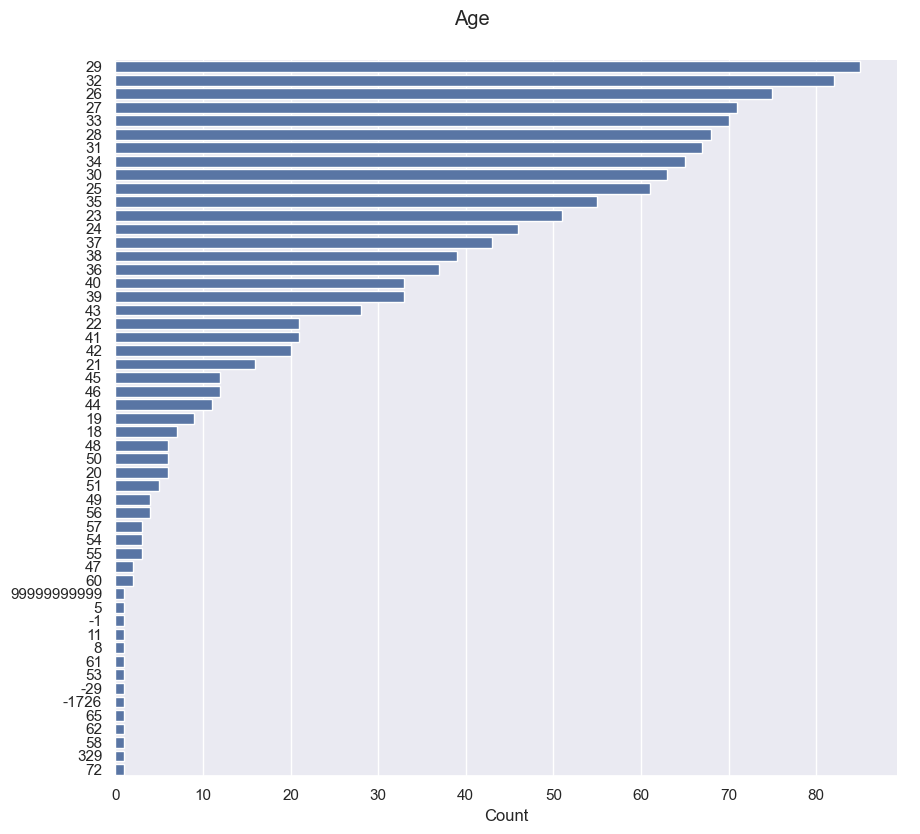

In [3564]:
order = df["Age"].value_counts().index

g = sns.catplot(y="Age", data=df, kind="count", order=order, height=8, aspect=1.1)
g.figure.suptitle("Age", y = 1.04)
g.set(xlabel="Count", ylabel="")   
g.figure.subplots_adjust(left=0.1)
plt.show()

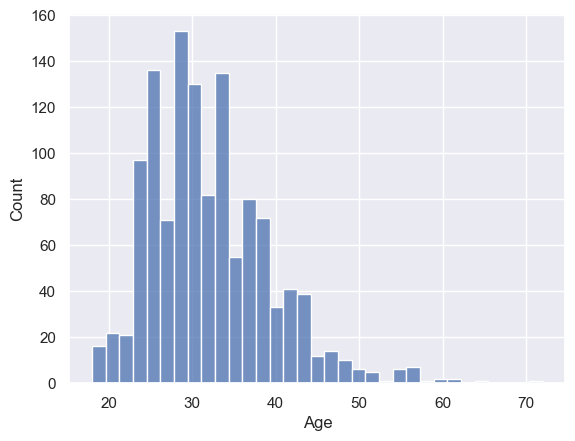

In [3565]:
age = pd.to_numeric(df["Age"], errors="coerce")

outlier = age.lt(18)| age.gt(80)

df["age_outlier"] = outlier

sns.histplot(df[~df["age_outlier"]]["Age"])
plt.show()

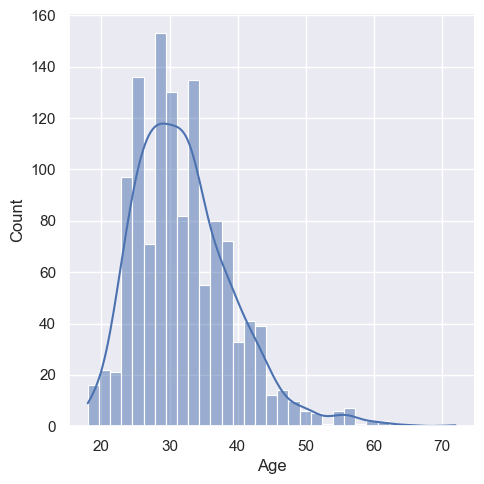

In [3566]:
sns.displot(df[~df["age_outlier"]]["Age"],
            kde=True)
plt.show()


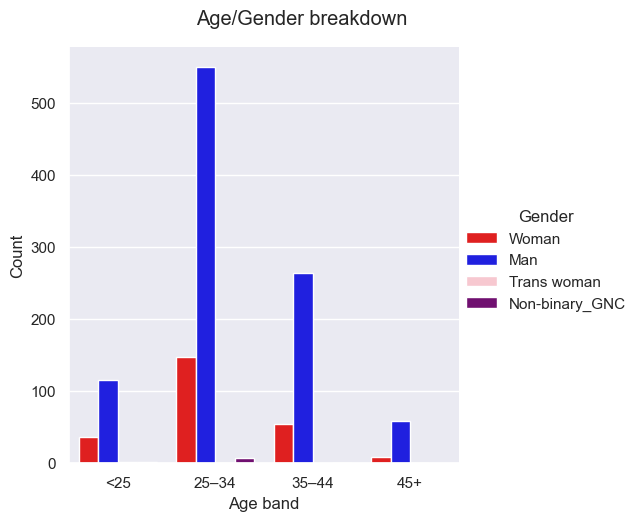

In [3567]:
df["age_cat_2"] = df["age_cat"].where(df["age_cat"].isin(["<25", "25–34", "35–44", "45+"]), pd.NA)

df["age_cat_2"] = df["age_cat_2"].astype(CategoricalDtype(categories=["<25", "25–34", "35–44", "45+"], ordered=True))

g = sns.catplot(data=df, x="age_cat_2", kind="count", hue=df["gender_5"].astype(CategoricalDtype(categories=["Woman", "Man", "Trans woman", "Non-binary_GNC"], ordered=False)), palette=["red", "blue", "pink", "purple"])
g.figure.suptitle("Age/Gender breakdown", y = 1.04)
g.set_xlabels("Age band")
g.set_ylabels("Count")
g._legend.set_title("Gender")
plt.show()

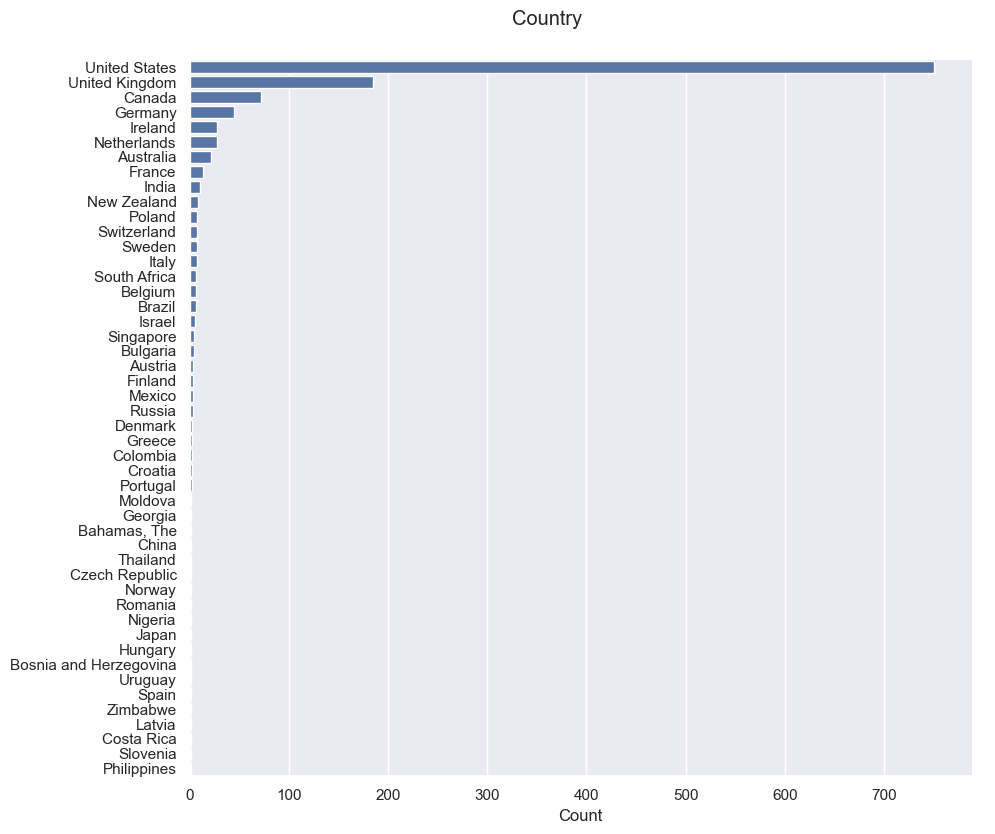

In [3568]:
order = df["Country"].value_counts().index

g = sns.catplot(y="Country", data=df, kind="count", order=order, height=8, aspect=1.1)
g.figure.suptitle("Country", y = 1.04)
g.set(xlabel="Count", ylabel="")           # nicer axis labels
g.figure.subplots_adjust(left=0.1) 
plt.show()    

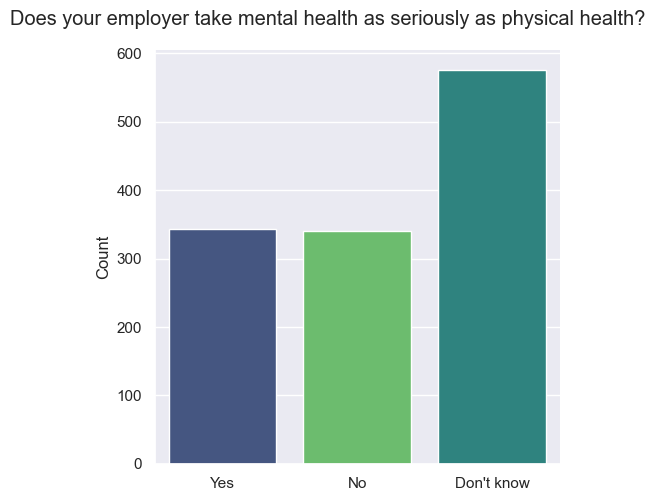

In [3569]:
g = sns.catplot(x="mental_vs_physical", data=df, kind="count", palette="viridis", hue="mental_vs_physical", order=["Yes", "No", "Don't know"])
g.figure.suptitle("Does your employer take mental health as seriously as physical health?", y = 1.04)
g.set_xlabels("")
g.set_ylabels("Count")
plt.show()

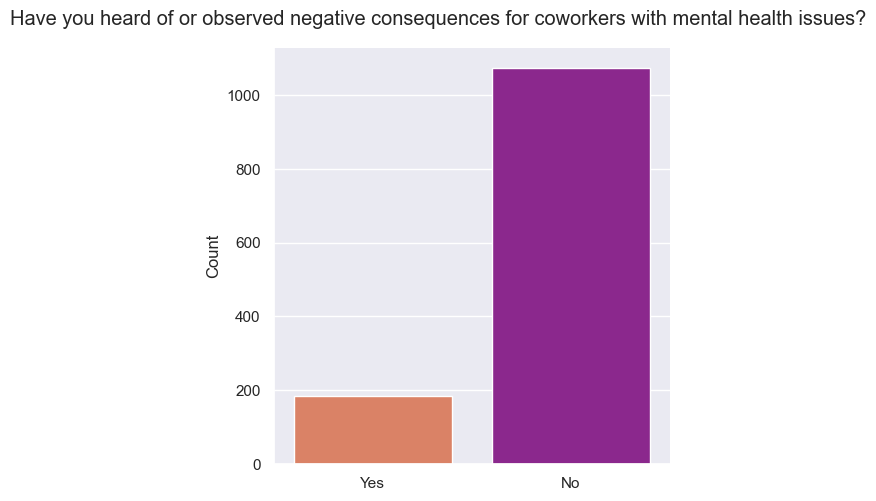

In [3570]:
g = sns.catplot(x="obs_consequence", data=df, kind="count", palette="plasma", hue="obs_consequence", order=["Yes", "No"])
g.figure.suptitle("Have you heard of or observed negative consequences for coworkers with mental health issues?", y = 1.04)
g.set_xlabels("")
g.set_ylabels("Count")
plt.show()

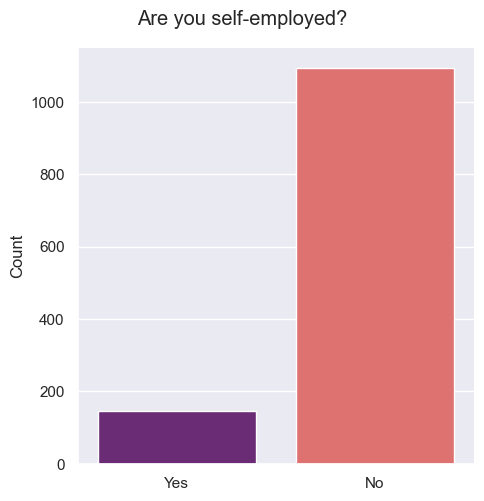

In [3571]:
g = sns.catplot(x="self_employed", data=df, kind="count", palette="magma", legend=False, hue="self_employed")
g.figure.suptitle("Are you self-employed?", y = 1.04)
g.set_xlabels("")
g.set_ylabels("Count")
plt.show()

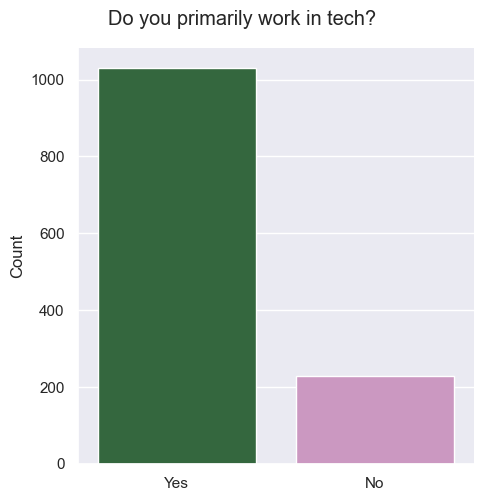

In [3572]:
g = sns.catplot(x="tech_company", data=df, kind="count", palette="cubehelix", hue="tech_company")
g.figure.suptitle("Do you primarily work in tech?", y = 1.04)
g.set_xlabels("")
g.set_ylabels("Count")
plt.show()

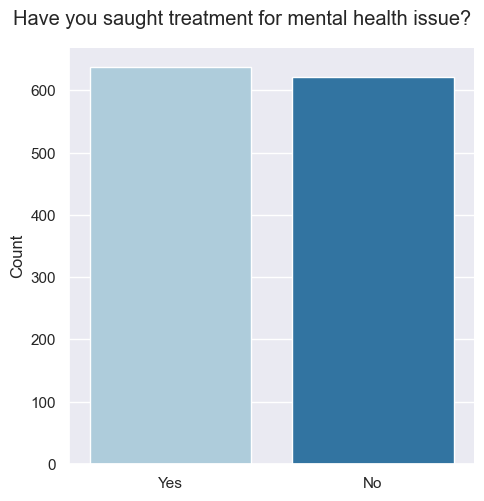

In [3573]:
g = sns.catplot(x="treatment", data=df, kind="count", palette="Paired", hue="treatment")
g.figure.suptitle("Have you saught treatment for mental health issue?", y = 1.04)
g.set_xlabels("")
g.set_ylabels("Count")
plt.show()

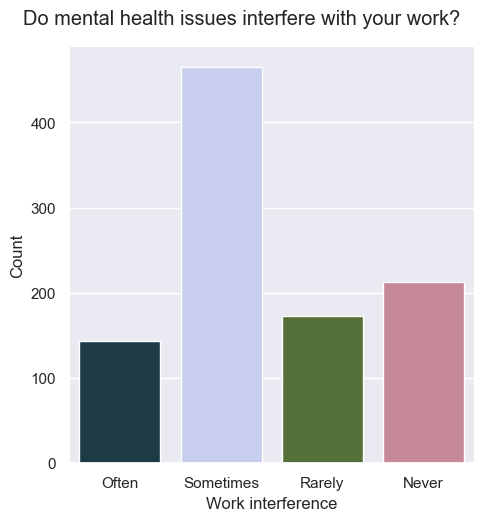

In [3574]:
g = sns.catplot(data=df, x="work_interfere", kind="count", order=["Often", "Sometimes", "Rarely", "Never"], palette="cubehelix", legend=False, hue="work_interfere")
g.figure.suptitle("Do mental health issues interfere with your work?", y = 1.04)
g.set_xlabels("Work interference")
g.set_ylabels("Count")
plt.show()

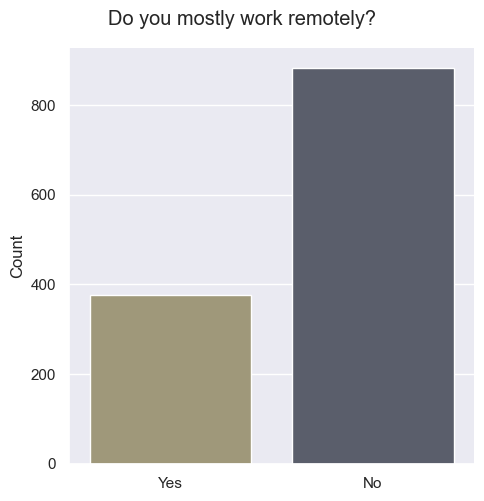

In [3575]:
g = sns.catplot(data=df, x="remote_work", kind="count", palette="cividis", hue="remote_work", order=["Yes", "No"])
g.figure.suptitle("Do you mostly work remotely?", y=1.04)
g.set_xlabels("")
g.set_ylabels("Count")
plt.show()

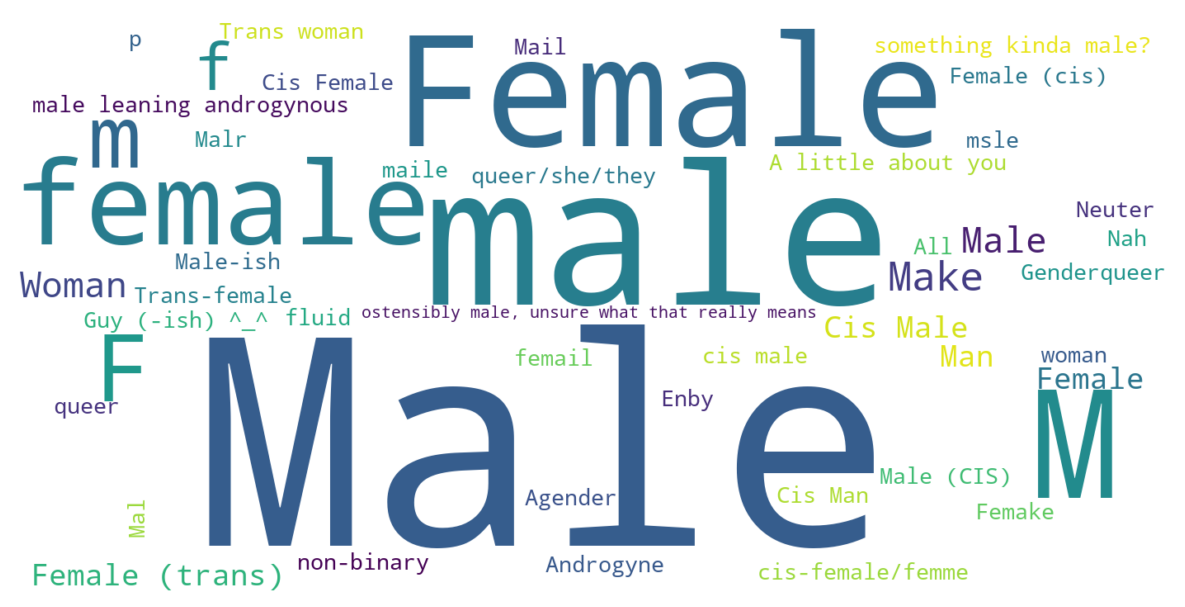

In [3632]:
# Libraries
from wordcloud import WordCloud # type: ignore
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)  # width, height in inches

# Create a list of word
freqs = (
    df["Gender"]        # or the column you prefer
      .dropna()
      .astype(str)
      .value_counts()
      .to_dict()
)

wc = WordCloud(width=1400, height=700, background_color="white", margin=0)
wc = wc.generate_from_frequencies(freqs)

# Display the generated image:
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
ax.margins(x=0, y=0)
plt.show()

## <span style="color:orange">Qestion-1: Do workplace policies (benefits, care options, anonymity, generous leave) correlate with higher treatment-seeking and lower work interference?</span>

In [3577]:
df.groupby("support_score")["treatment"].count().reset_index()

,support_score,treatment
0,0,517
1,1,251
2,2,203
3,3,115
4,4,92
5,5,81


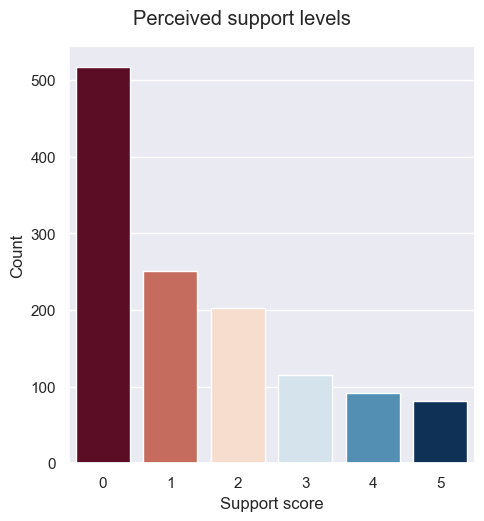

In [3578]:
g = sns.catplot(x="support_score", data=df, kind="count", palette="RdBu", hue="support_score", legend=False)
g.figure.suptitle("Perceived support levels", y = 1.04)
g.set_xlabels("Support score")
g.set_ylabels("Count")
plt.show()

<div class="alert alert-info">
<b>Insight:</b>

 * The distribution is heavily skewed to low support.

* Most respondents sit at support=0, then counts drop steadily as support increases; only a small minority report scores 4–5.

* Note: “Don’t know/Not sure” are coded as 0. So the big bar at 0 mixes true absence of policies with low visibility/awareness. 

    * That’s important for interpretation: it suggests either few supports exist or employees don’t know about them.

</div>

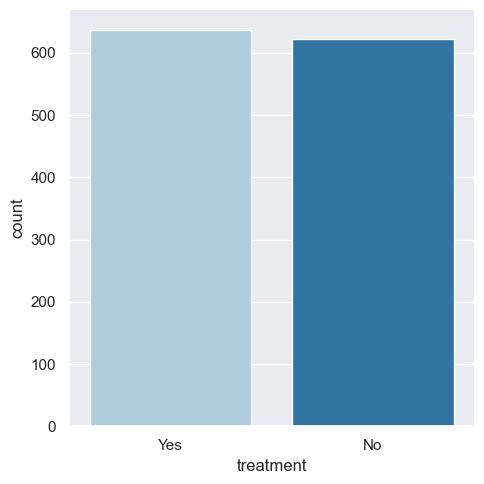

In [3579]:
sns.catplot(x="treatment", data=df, kind="count", palette="Paired", hue="treatment")
plt.show()

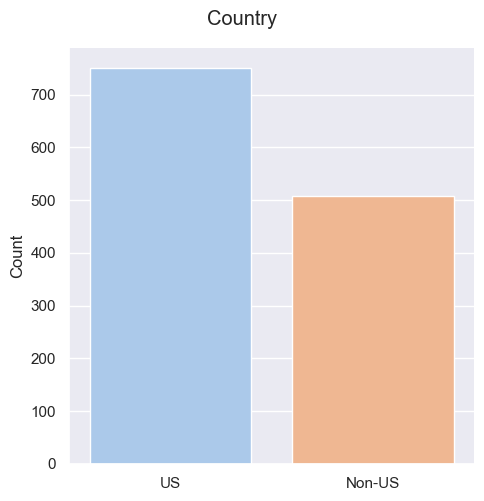

In [3580]:
g = sns.catplot(x=df["us_category"].cat.remove_unused_categories(), data=df, kind="count", palette="pastel", hue="us_category")
g.figure.suptitle("Country", y=1.04)
g.set_ylabels("Count")
g.set_xlabels("")
plt.show()

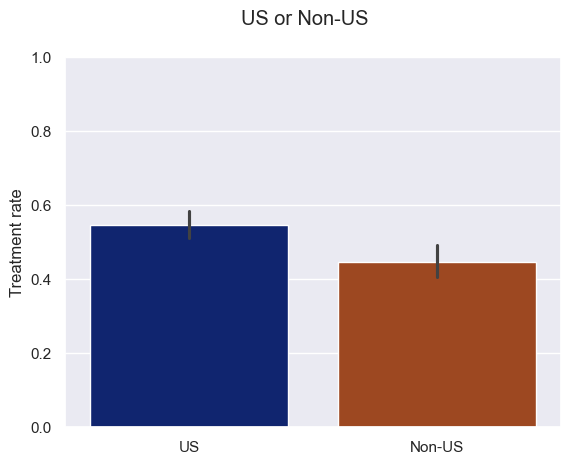

In [3581]:
# Add 0/1 for treatment: `treat_bin` to `df`
df["treat_bin"] = df["treatment"].str.strip().str.casefold().map({"yes":1,"no":0}).astype("Int64")


g = sns.barplot(data=df, y="treat_bin", x=df["us_category"].cat.remove_unused_categories(), palette="dark", hue=df["us_category"].cat.remove_unused_categories())
g.figure.suptitle("US or Non-US")
g.set_ylabel("Treatment rate")
g.set_xlabel("")
g.set(ylim=(0,1))
plt.show()

In [3582]:
import numpy as np
from scipy import stats

# two masks
us_mask = df["us_category"].eq("US")
non_us_mask = df["us_category"].eq("Non-US")

# pull the binary outcome; drop missing, make numeric arrays
g_us_mask = df.loc[us_mask, "treat_bin"].dropna().astype(float).to_numpy()
g_non_us_mask = df.loc[non_us_mask, "treat_bin"].dropna().astype(float).to_numpy()

alpha = 0.05

# Welch’s t-test (safer with unequal variances)
t_stat, p_val = stats.ttest_ind(g_us_mask, g_non_us_mask, equal_var=False)

print(f"n_women={g_us_mask.size}, n_men={g_non_us_mask.size}")
print(f"mean_women={g_us_mask.mean():.3f}, mean_men={g_non_us_mask.mean():.3f}, diff={g_us_mask.mean()-g_non_us_mask.mean():.3f}")
print(f"t={t_stat:.3f}, p={p_val:.6f}")

if p_val < alpha:
    print("Reject H0: groups differ.")
else:
    print("Fail to reject H0: no evidence of a difference.")

n_women=751, n_men=508
mean_women=0.546, mean_men=0.447, diff=0.099
t=3.464, p=0.000552
Reject H0: groups differ.


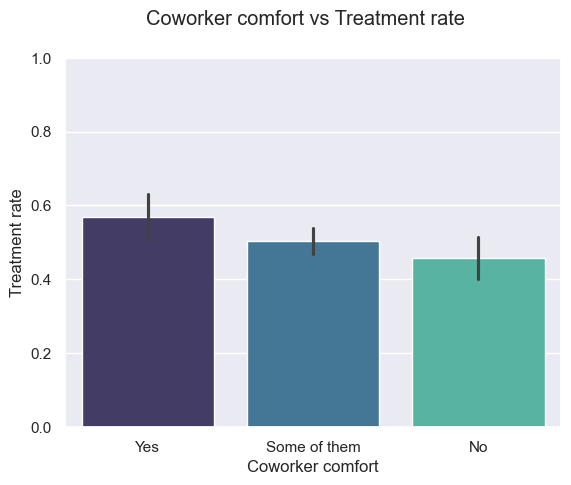

In [3583]:
g = sns.barplot(data=df, x="comfort_coworkers_cat", y="treat_bin", estimator=np.mean, errorbar=("ci", 95), dodge=False, palette="mako", hue="comfort_coworkers_cat")
g.figure.suptitle("Coworker comfort vs Treatment rate")
g.set_ylabel("Treatment rate")
g.set_xlabel("Coworker comfort")
g.set(ylim=(0,1))
plt.show()

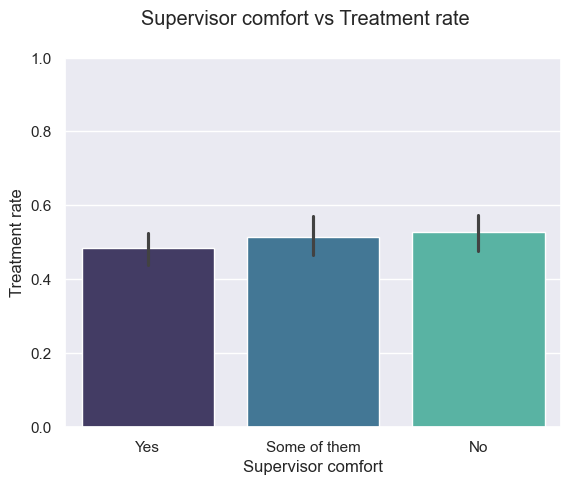

In [3584]:
g = sns.barplot(data=df, x="comfort_supervisor_cat" , y="treat_bin", estimator=np.mean, errorbar=("ci", 95), dodge=False, hue="comfort_supervisor_cat", palette="mako")
g.figure.suptitle("Supervisor comfort vs Treatment rate")
g.set_ylabel("Treatment rate")
g.set_xlabel("Supervisor comfort")
g.set(ylim=(0,1))
plt.show()

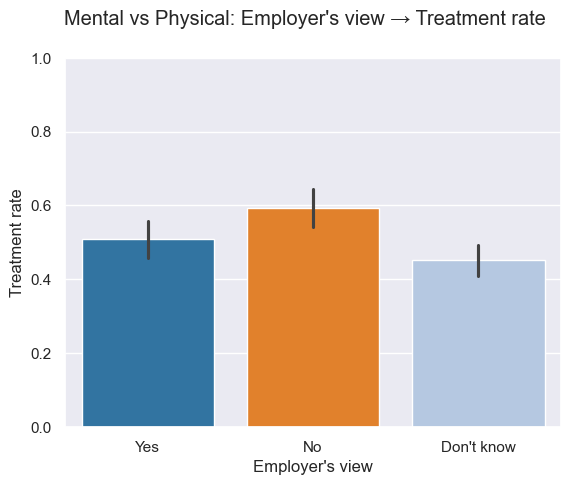

In [3585]:
g = sns.barplot(data=df, x="mental_vs_physical", y="treat_bin", palette="tab20", estimator=np.mean, errorbar=("ci", 95), dodge=False, hue="mental_vs_physical", order=["Yes", "No", "Don't know"])
g.set(ylim=(0,1))
g.figure.suptitle("Mental vs Physical: Employer's view → Treatment rate")
g.set_ylabel("Treatment rate")
g.set_xlabel("Employer's view")
plt.show()


In [3586]:
df["work_interfere_cat"] = df["work_interfere"].astype(CategoricalDtype(categories=["Never", "Rarely", "Sometimes", "Often"]))

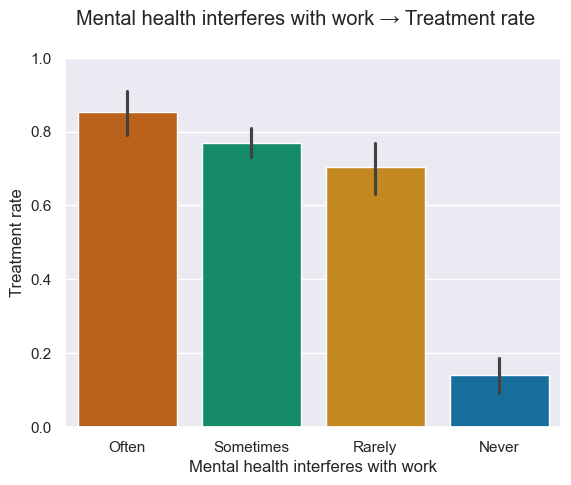

In [3587]:

g = sns.barplot(data=df, x="work_interfere_cat", y="treat_bin", palette="colorblind", estimator=np.mean, errorbar=("ci", 95), dodge=False, hue="work_interfere_cat", legend=False, order=["Often", "Sometimes", "Rarely", "Never"])
g.set(ylim=(0,1))
g.figure.suptitle("Mental health interferes with work → Treatment rate")
g.set_ylabel("Treatment rate")
g.set_xlabel("Mental health interferes with work")
plt.show()

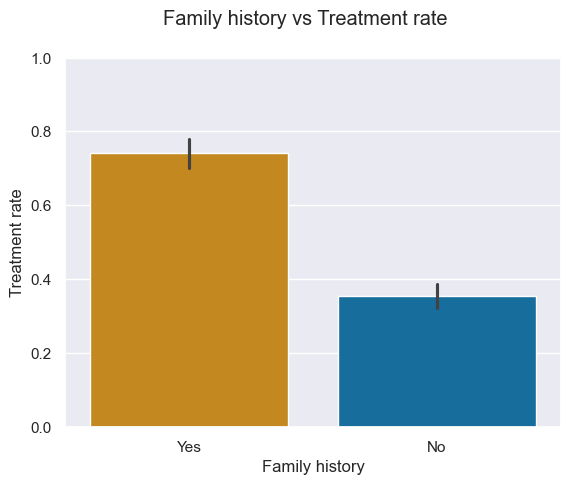

In [3588]:
g = sns.barplot(data=df, x="family_history", y="treat_bin", palette="colorblind", estimator=np.mean, errorbar=("ci", 95), dodge=False, hue="family_history", order=["Yes","No"])
g.set(ylim=(0,1))
g.figure.suptitle("Family history vs Treatment rate")
g.set_xlabel("Family history")
g.set_ylabel("Treatment rate")
plt.show()

In [3589]:
df["work_interfere_sev"].unique()

array([ 3.,  1.,  0.,  2., nan])

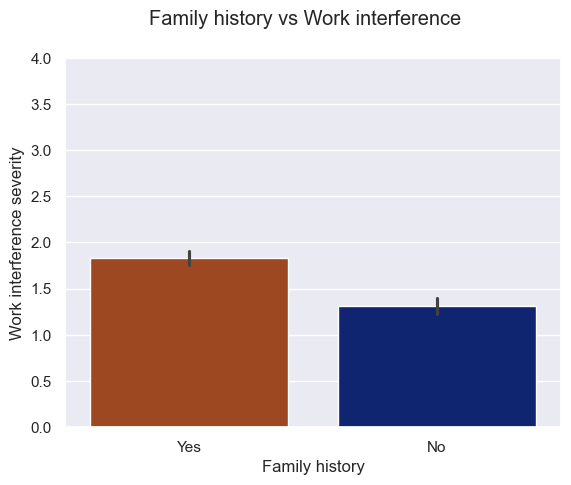

In [3590]:
g = sns.barplot(data=df, x="family_history", y="work_interfere_sev", palette="dark", estimator=np.mean, errorbar=("ci", 95), dodge=False, hue="family_history", order=["Yes", "No"])
g.set(ylim=(0,4))
g.figure.suptitle("Family history vs Work interference")
g.set_xlabel("Family history")
g.set_ylabel("Work interference severity")
plt.show()

<div class="alert alert-info">
<b>Insight:</b>

* The bars for treatment = Yes and No are almost the same height, so among respondents who answered this item, about half report having sought treatment (maybe a slight edge to “Yes”).

</div>

<span style="color:orange"> Quick reminder</span>
* `treatment`: Have you sought treatment for a mental health condition? <span style="color:pink">(`Yes`->`1`, `No`->`0`)</span>
* `support_score`: <span style="color:pink">“supportive” answer (`yes`) becomes `1`. Everything else becomes `0`</span>
    * `benefits`: Does your employer provide mental health benefits?
    * `care_options`: Do you know the options for mental health care your employer provides?
    * `seek_help`: Does your employer provide resources to learn more about mental health issues and how to seek help?
    * `anonymity`: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
    * `wellness_program`: Has your employer ever discussed mental health as part of an employee wellness program?

### Exploring the components of support score

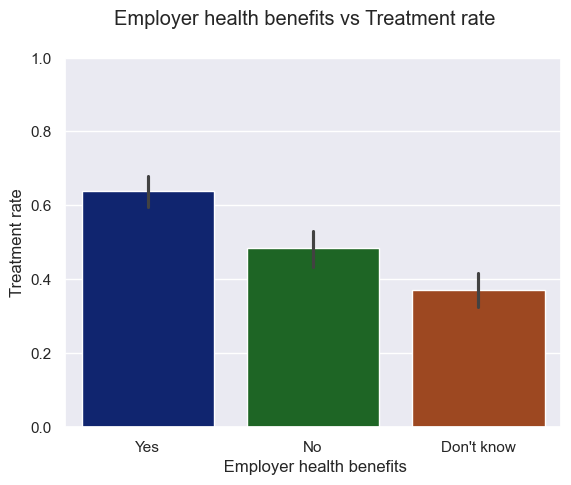

In [3591]:
g = sns.barplot(data=df, x="benefits", y="treat_bin", order=["Yes", "No", "Don't know"], palette="dark", hue="benefits")
g.set(ylim=(0,1))
g.set_ylabel("Treatment rate")
g.set_xlabel(" Employer health benefits")
g.figure.suptitle("Employer health benefits vs Treatment rate")
plt.show()


In [3592]:
sum(df["care_options"].isna())

0

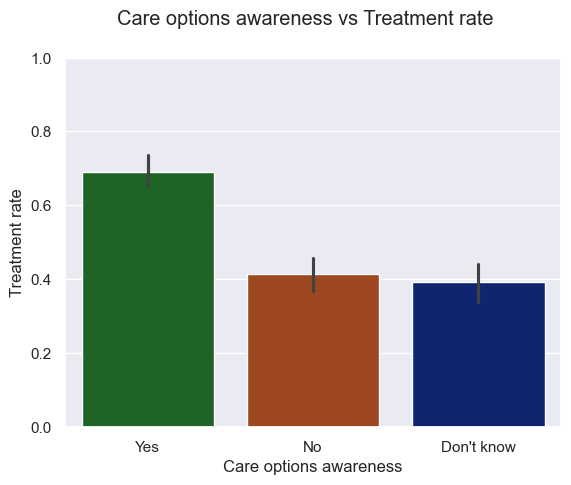

In [3593]:
care_options_map = {"Yes": "Yes", "No": "No", "Not sure": "Don't know"}
df["care_options_plt"] = df["care_options"].map(care_options_map)
g = sns.barplot(data=df, x="care_options_plt", y="treat_bin", order=["Yes", "No", "Don't know"], palette="dark", hue="care_options_plt")
g.set(ylim=(0,1))
g.set_ylabel("Treatment rate")
g.set_xlabel("Care options awareness")
g.figure.suptitle("Care options awareness vs Treatment rate")
plt.show()

In [3594]:
print(df["seek_help"].unique())
print(sum(df["seek_help"].isna()))

['Yes' "Don't know" 'No']
0


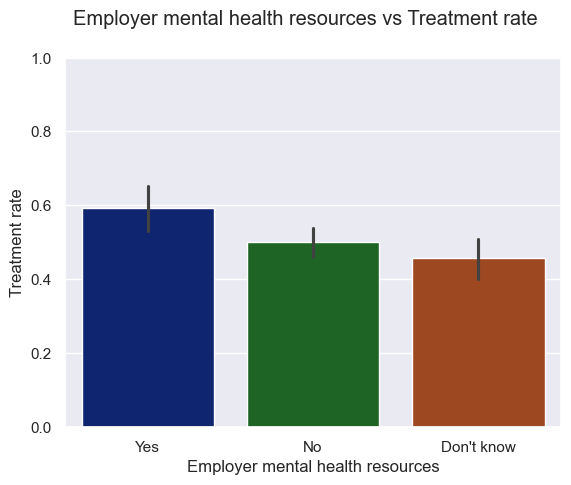

In [3595]:
g = sns.barplot(data=df, x="seek_help", y="treat_bin", order=["Yes", "No", "Don't know"], palette="dark", hue="seek_help")
g.set(ylim=(0,1))
g.set_ylabel("Treatment rate")
g.set_xlabel("Employer mental health resources")
g.figure.suptitle("Employer mental health resources vs Treatment rate")
plt.show()

In [3596]:
print(df["anonymity"].unique())
print(sum(df["anonymity"].isna()))

['Yes' "Don't know" 'No']
0


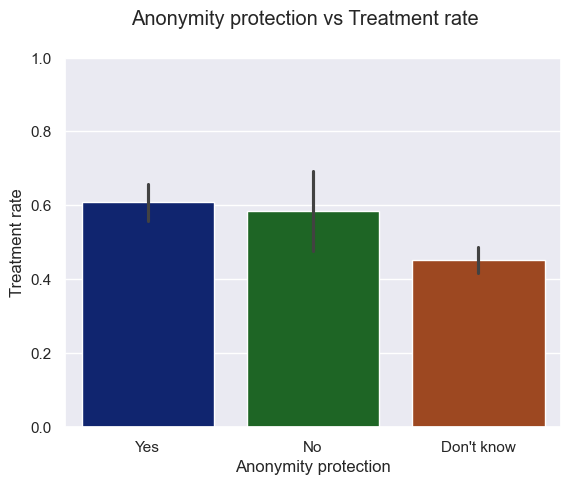

In [3597]:
g = sns.barplot(data=df, x="anonymity", y="treat_bin", order=["Yes", "No", "Don't know"], palette="dark", hue="anonymity")
g.set(ylim=(0,1))
g.set_ylabel("Treatment rate")
g.set_xlabel("Anonymity protection")
g.figure.suptitle("Anonymity protection vs Treatment rate")
plt.show()

In [3598]:
print(df["wellness_program"].unique())
print(sum(df["wellness_program"].isna()))

['No' "Don't know" 'Yes']
0


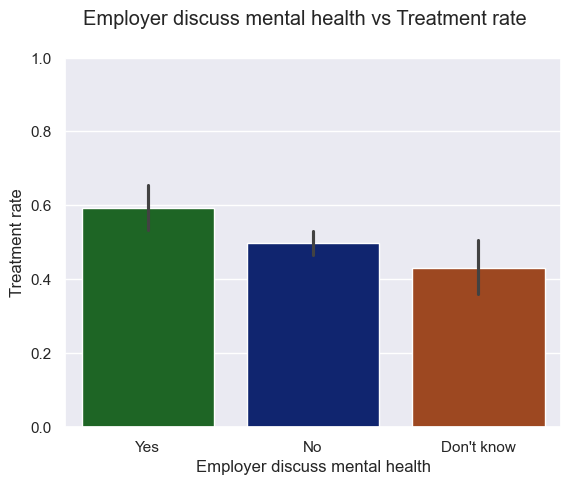

In [3599]:
g = sns.barplot(data=df, x="wellness_program", y="treat_bin", order=["Yes", "No", "Don't know"], palette="dark", hue="wellness_program")
g.set(ylim=(0,1))
g.set_ylabel("Treatment rate")
g.set_xlabel("Employer discuss mental health")
g.figure.suptitle("Employer discuss mental health vs Treatment rate")
plt.show()

### Support score vs. treatment rate

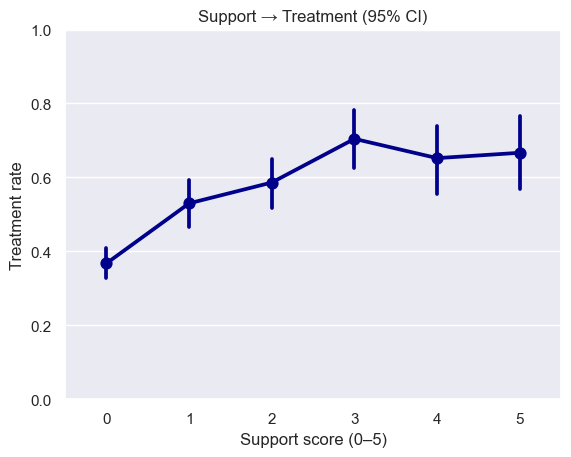

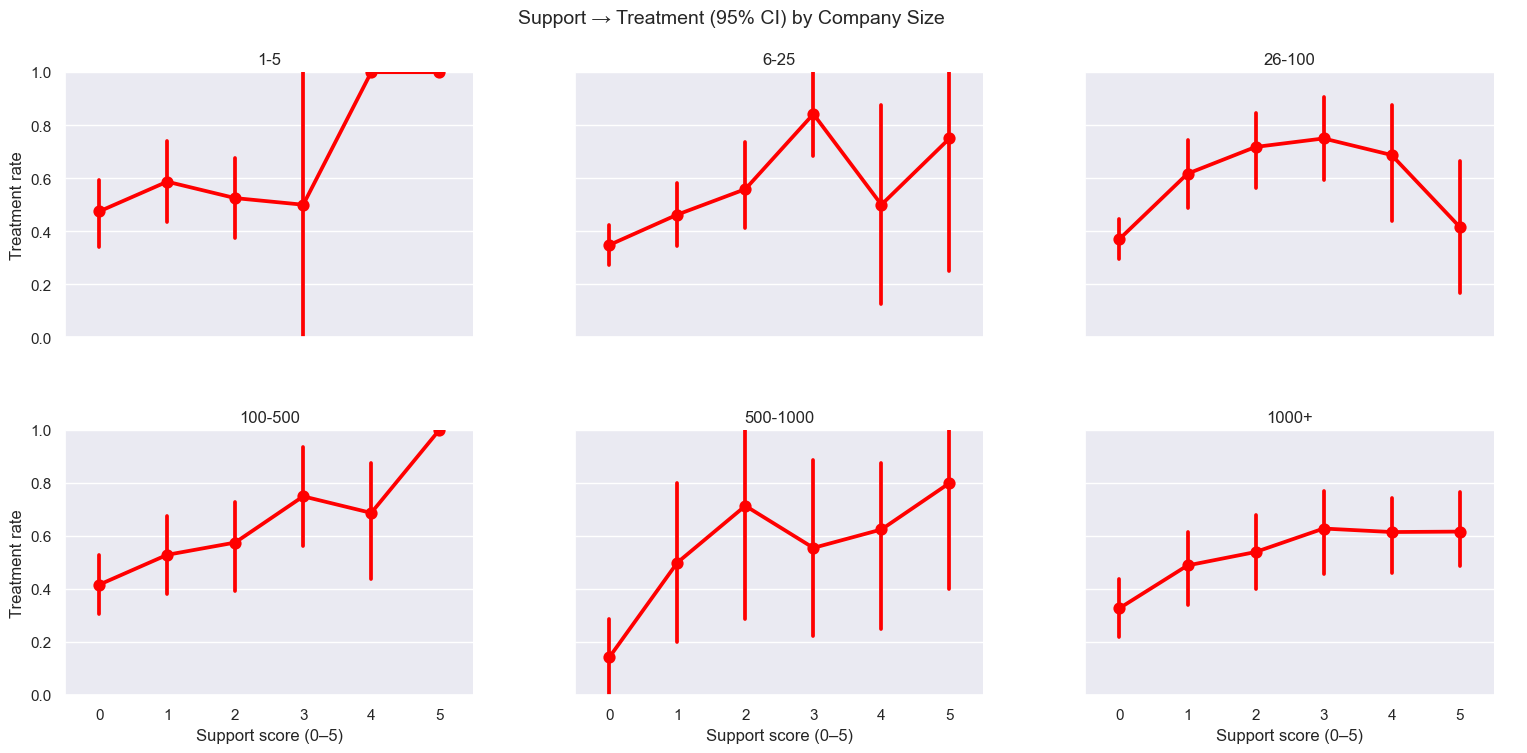

In [3600]:
# Add 0/1 for treatment: `treat_bin` to `df`
df["treat_bin"] = df["treatment"].str.strip().str.casefold().map({"yes":1,"no":0}).astype("Int64")

# 1) Overall: Support → Treatment (95% CI)
g = sns.pointplot(
    data=df, x="support_score", y="treat_bin",
    estimator=np.mean, errorbar=("ci", 95), dodge=False,
    color="darkblue"    
)
g.set(xlabel="Support score (0–5)", ylabel="Treatment rate", ylim=(0, 1),
       title="Support → Treatment (95% CI)")
plt.show()

# 2) Small multiples by company size
g = sns.catplot(
    data=df, x="support_score", y="treat_bin",
    col="company_size_cat", col_wrap=3, kind="point",
    estimator=np.mean, errorbar=("ci", 95), dodge=False,
    height=3.5, aspect=1.5,
    color="red"
)

g.set_axis_labels("Support score (0–5)", "Treatment rate")
g.set(ylim=(0, 1))
g.set_titles(col_template="{col_name}")

fig = g.figure

fig.suptitle("Support → Treatment (95% CI) by Company Size", fontsize=14)

fig.tight_layout()
fig.subplots_adjust(bottom=0, top=.89, left=0.08, right=0.98)  # margins
fig.subplots_adjust(wspace=0.25, hspace=0.35) # spacing between facets

plt.show()

<div class="alert alert-info">
<b>Insight:</b>

* There is a clear positive association between perceived support and treatment seeking.

* Employees who report more visible/accessible support policies are substantially more likely to seek treatment, with gains up to about support=3 and a plateau thereafter

</div>


<div class="alert alert-danger" style="color: blue;">
  Make a new company size variable that bins the company sizes as the following: <=25, 26-100, 101-500, >500. Then replot these plots with the new company size variable.
</div>

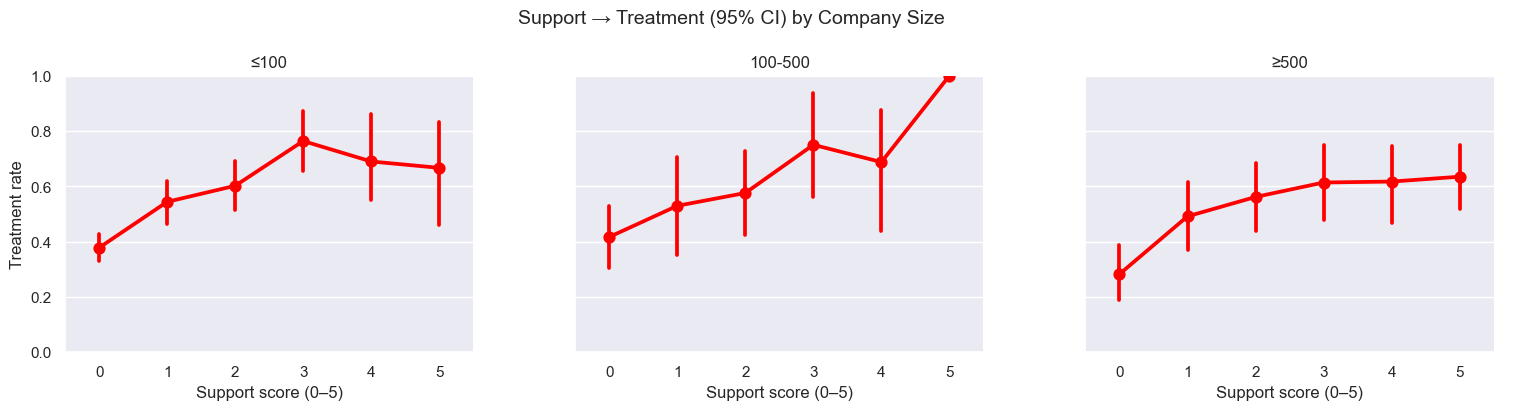

In [3601]:
# 2) Small multiples by company size
g = sns.catplot(
    data=df, x="support_score", y="treat_bin",
    col="company_size_cat2", col_wrap=3, kind="point",
    estimator=np.mean, errorbar=("ci", 95), dodge=False,
    height=3.5, aspect=1.5,
    color="red"
)

g.set_axis_labels("Support score (0–5)", "Treatment rate")
g.set(ylim=(0, 1))
g.set_titles(col_template="{col_name}")

fig = g.figure

fig.suptitle("Support → Treatment (95% CI) by Company Size", fontsize=14)

fig.tight_layout()
fig.subplots_adjust(bottom=0, top=.79, left=0.08, right=0.98)  # margins
fig.subplots_adjust(wspace=0.25, hspace=0.35) # spacing between facets

plt.show()

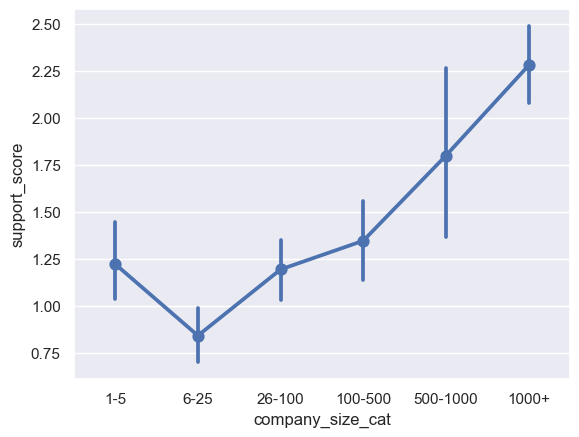

In [3602]:
sns.pointplot(data=df, x="company_size_cat", y="support_score")
plt.show()

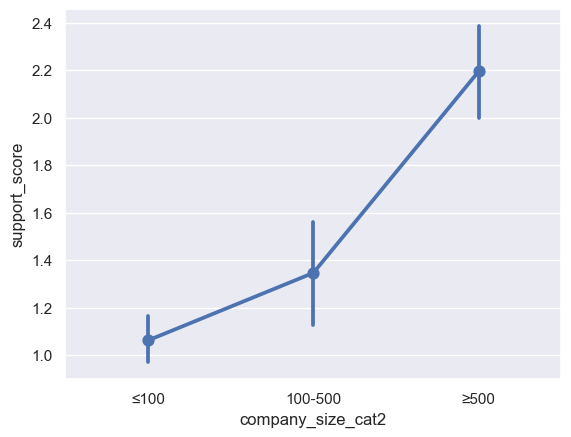

In [3603]:
sns.pointplot(data=df, x="company_size_cat2", y="support_score")
plt.show()

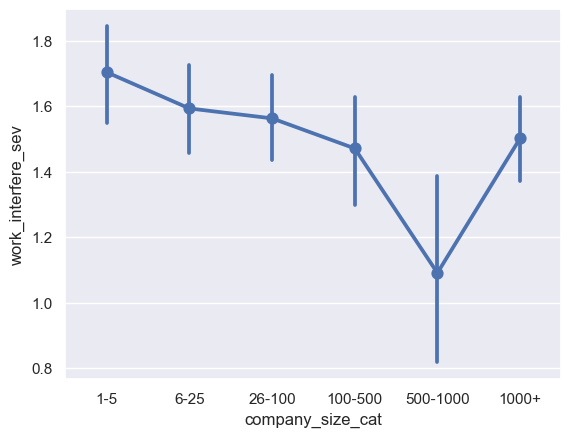

In [3604]:
sns.pointplot(data=df, x="company_size_cat", y="work_interfere_sev")
plt.show()

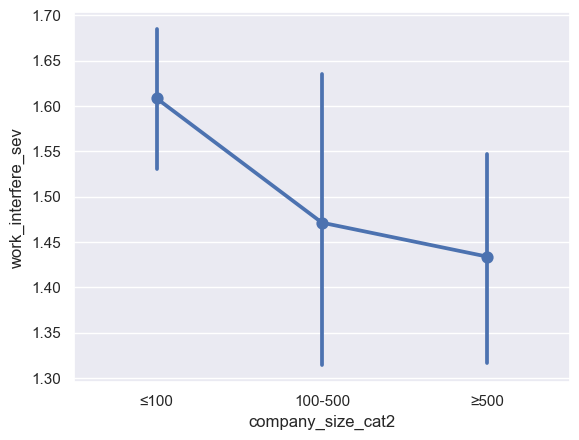

In [3605]:
sns.pointplot(data=df, x="company_size_cat2", y="work_interfere_sev", estimator=np.mean, errorbar=("ci", 95), dodge=False)
plt.show()

In [3606]:
df["gender_3"].unique()

array(['Woman', 'Man', 'Non-binary_GNC', 'Unknown/Other'], dtype=object)

gender_2
Man      993
Woman    251
NaN       15
Name: count, dtype: int64


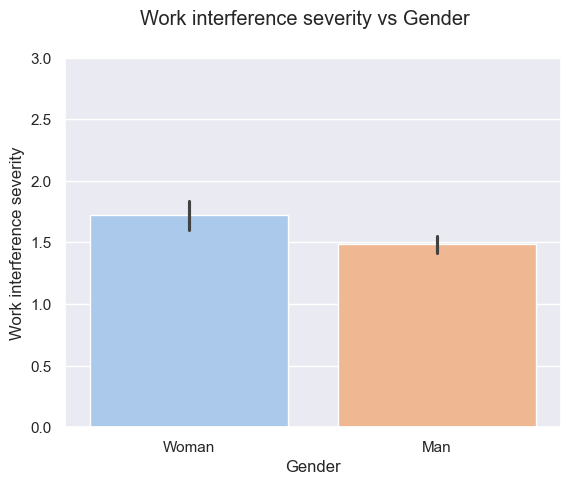

In [3607]:
df["gender_2"] = df["gender_3"].where(df["gender_3"].isin(["Woman", "Man"]), pd.NA)

df["gender_2"] = df["gender_2"].astype(CategoricalDtype(categories=["Woman", "Man"], ordered=False))

#Sanity check
print(df["gender_2"].value_counts(dropna=False))

g= sns.barplot(data=df, x="gender_2", y="work_interfere_sev", estimator=np.mean, errorbar=("ci", 95), dodge=False, palette="pastel", hue="gender_2", legend=False)
g.set(ylim=(0, 3)) 
g.set_xlabel("Gender")
g.set_ylabel("Work interference severity")
g.figure.suptitle("Work interference severity vs Gender")
plt.show()

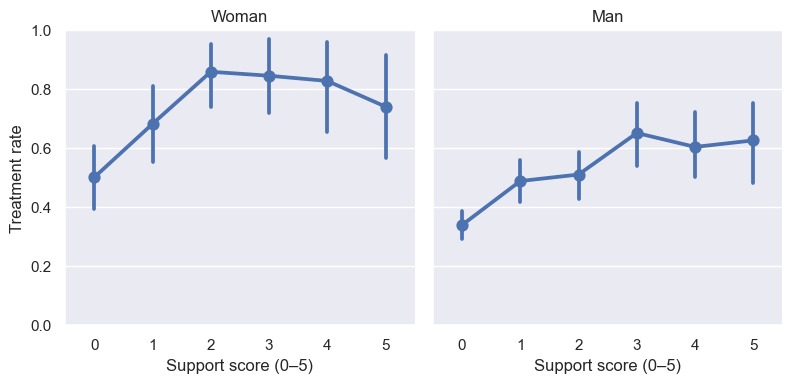

In [3608]:
g = sns.catplot(
    data=df,
    x="support_score", y="treat_bin",
    col="gender_2",
    kind="point",
    estimator=np.mean, errorbar=("ci", 95),
    order=[0,1,2,3,4,5], dodge=False,
    height=4, aspect=1.0, sharey=True
)
g.set_axis_labels("Support score (0–5)", "Treatment rate")
g.set(ylim=(0, 1))  
g.set_titles("{col_name}")
plt.show()

In [3609]:
# g = sns.barplot(data=df, y="treat_bin", x = "support_score", estimator=np.mean, errorbar=("ci", 95), dodge=False, palette="viridis")
# g.figure.suptitle("Support → Treatment rate")
# g.set_xlabel("Support score")
# g.set_ylabel("Treatment rate")

In [3610]:
import numpy as np
import pandas as pd
from itertools import combinations
from scipy import stats
from statsmodels.stats.multitest import multipletests

# 0) Ensure the outcome is numeric 0/1 and drop NAs
y = df["treat_bin"].astype(float)

# 1) Build arrays per support group
groups = {}
for s in sorted(df["support_score"].dropna().unique()):
    groups[s] = y[df["support_score"].eq(s)].dropna().to_numpy()

# Optional: skip tiny groups
# groups = {k:v for k,v in groups.items() if v.size >= 10}

# 2) Pairwise Welch t-tests (safer than equal_var=True)
rows = []
for g1, g2 in combinations(sorted(groups), 2):
    x, y_ = groups[g1], groups[g2]
    t, p = stats.ttest_ind(x, y_, equal_var=False)
    rows.append({
        "grp1": g1, "grp2": g2,
        "n1": x.size, "n2": y_.size,
        "mean1": x.mean(), "mean2": y_.mean(),
        "diff": x.mean() - y_.mean(),
        "t": t, "p_raw": p
    })

res = pd.DataFrame(rows)

# 3) Multiple-comparison correction (Holm and Bonferroni)
res["p_bonf"] = multipletests(res["p_raw"], method="bonferroni")[1]
res["p_holm"] = multipletests(res["p_raw"], method="holm")[1]
res["sig_0.05_holm"] = res["p_holm"] < 0.05

# 4) Nicely sorted view
res = res.sort_values("p_holm").reset_index(drop=True)
res

,grp1,grp2,n1,n2,mean1,mean2,diff,t,p_raw,p_bonf,p_holm,sig_0.05_holm
0,0,3,517,115,0.367505,0.704348,-0.336843,-7.058800,3.794460e-11,5.691690e-10,5.691690e-10,True
1,0,2,517,203,0.367505,0.586207,-0.218702,-5.381939,1.326843e-07,1.990265e-06,1.857581e-06,True
2,0,4,517,92,0.367505,0.652174,-0.284669,-5.247184,6.335546e-07,9.503319e-06,8.236210e-06,True
3,0,5,517,81,0.367505,0.666667,-0.299162,-5.265292,7.221779e-07,1.083267e-05,8.666135e-06,True
4,0,1,517,251,0.367505,0.529880,-0.162376,-4.268754,2.370100e-05,3.555150e-04,2.607110e-04,True
5,1,3,251,115,0.529880,0.704348,-0.174467,-3.283599,1.177878e-03,1.766817e-02,1.177878e-02,True
6,1,5,251,81,0.529880,0.666667,-0.136786,-2.226534,2.755498e-02,4.133248e-01,2.479949e-01,False
7,2,3,203,115,0.586207,0.704348,-0.118141,-2.147124,3.273880e-02,4.910820e-01,2.619104e-01,False
8,1,4,251,92,0.529880,0.652174,-0.122293,-2.070330,3.994689e-02,5.992034e-01,2.796282e-01,False
9,1,2,251,203,0.529880,0.586207,-0.056326,-1.201631,2.301609e-01,1.000000e+00,1.000000e+00,False


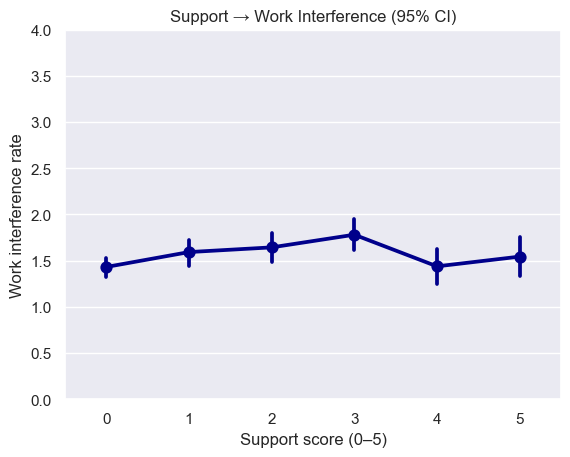

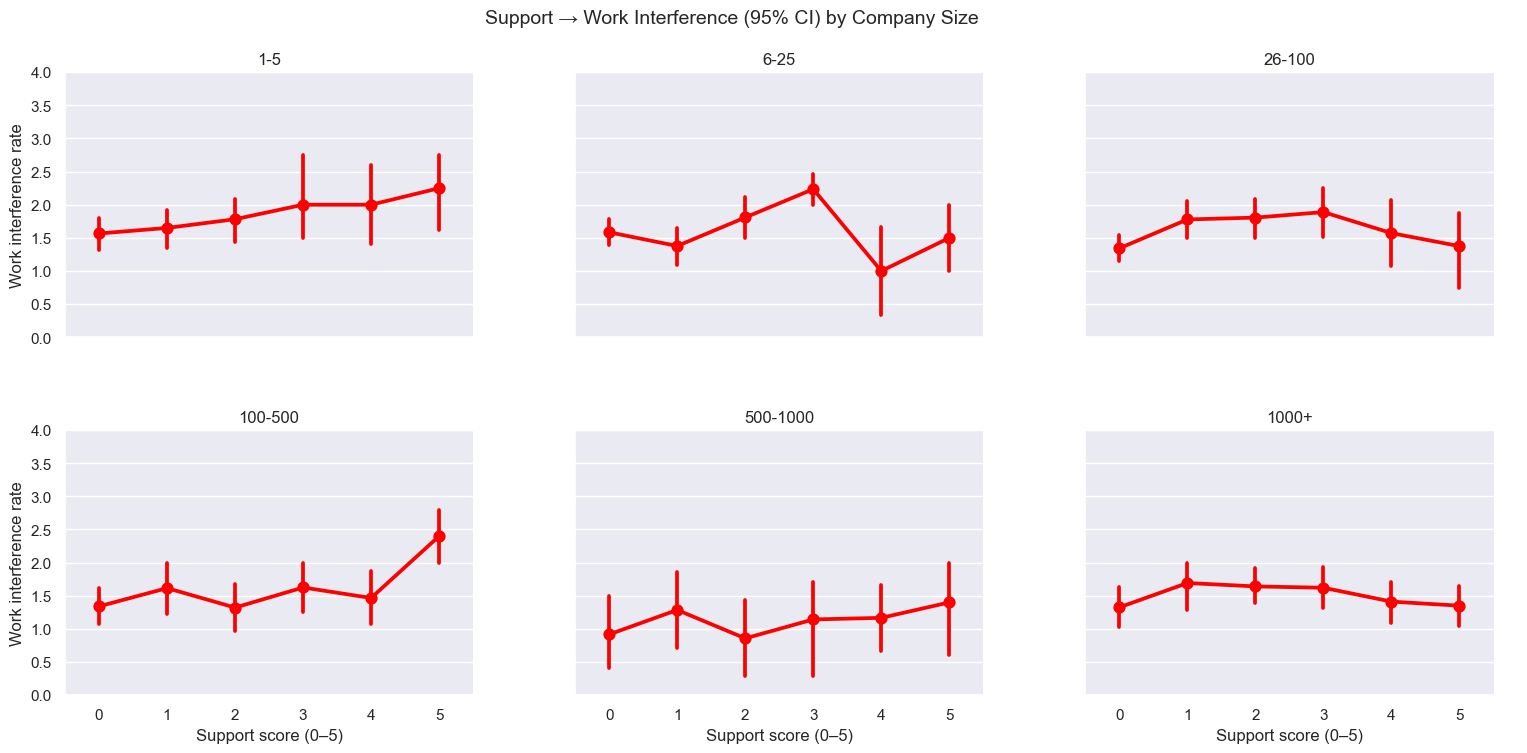

In [3611]:
# 1) Overall: Support → Work interference severity (95% CI)
ax = sns.pointplot(
    data=df, x="support_score", y="work_interfere_sev",
    estimator=np.mean, errorbar=("ci", 95), dodge=False, color="darkblue"
)
ax.set(xlabel="Support score (0–5)", ylabel="Work interference rate", ylim=(0, 4),
       title="Support → Work Interference (95% CI)")
plt.show()

# 2) Small multiples by company size
g = sns.catplot(
    data=df, x="support_score", y="work_interfere_sev",
    col="company_size_cat", col_wrap=3, kind="point",
    estimator=np.mean, errorbar=("ci", 95), dodge=False,
    height=3.5, aspect=1.5, color="red"
)

g.set_axis_labels("Support score (0–5)", "Work interference rate")
g.set(ylim=(0, 4))
g.set_titles(col_template="{col_name}")

fig = g.figure

fig.suptitle("Support → Work Interference (95% CI) by Company Size", fontsize=14)

fig.tight_layout()
fig.subplots_adjust(bottom=0, top=.89, left=0.08, right=0.98)  # margins
fig.subplots_adjust(wspace=0.25, hspace=0.35) # spacing between facets

plt.show()

<div class="alert alert-info">
<b>Insight:</b>

* Work interference (0–3 scale) hovers around 1.4–1.8 across support levels

* Error bars (95% CIs) overlap a lot, so differences between support scores are small/uncertain

* No clear “more support → less interference” pattern in the aggregate

* Confounding / reverse causality: orgs with more visible support may also be places with heavier workloads or higher need, so interference stays similar
</div>

## <span style="color:orange">Question-2: Is there a mismatch between willingness to discuss mental vs physical health (interview/leave consequences questions), and does that gap predict treatment or interference?</span>

<span style="color:orange"> Quick reminder</span>
* `mental_health_consequence`: Do you think that discussing a mental health issue with your employer would have negative consequences? <span style="color:pink">(Yes/Maybe->negative, No->Positive)</span>
* `phys_health_consequence`: Do you think that discussing a physical health issue with your employer would have negative consequences? <span style="color:pink">(Yes/Maybe->negative, No->Positive)</span>
* `mental_health_interview`: Would you bring up a mental health issue with a potential employer in an interview? <span style="color:pink">(Yes/Maybe->negative, No->Positive)</span>
* `phys_health_interview`: Would you bring up a physical health issue with a potential employer in an interview? <span style="color:pink">(Maybe/No->Negative, Yes->Positive)</span>

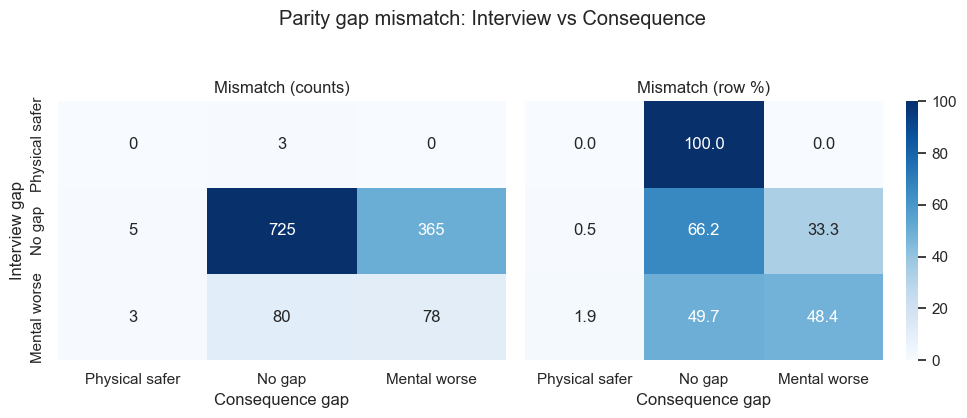

In [3612]:
sns.set_theme()

# Crosstabs (keep order; fill missing combos with 0)
ct = pd.crosstab(df["parity_gap_interview_cat"], df["parity_gap_consequence_cat"])

# Row percentages (avoid divide-by-zero if a row is entirely 0)
ct_pct = ct.div(ct.sum(axis=1).replace(0, np.nan), axis=0) * 100

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.heatmap(ct, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax[0])
ax[0].set_title("Mismatch (counts)") 
ax[0].set_xlabel("Consequence gap")
ax[0].set_ylabel("Interview gap")

sns.heatmap(ct_pct.round(1), annot=True, fmt=".1f", cmap="Blues", cbar=True, ax=ax[1])
ax[1].set_title("Mismatch (row %)")
ax[1].set_xlabel("Consequence gap")
ax[1].set_ylabel("")

fig.suptitle("Parity gap mismatch: Interview vs Consequence", y=1.04)
fig.tight_layout()
plt.show()

<div class="alert alert-info">
<b>Insight:</b>

* “No gap” = the two coded values are the same, so the difference is 0. It does not mean “good” or “no problem”; it only means mental and physical are judged equally on that question. So “No gap” can be equally positive (both safe/comfortable) or equally negative (both risky/reluctant).

* Overall agreement (~64%)
    * Diagonal cells = agreement between the two framings. You have 725 (“No gap/No gap”) + 78 (“Mental worse/Mental worse”) = 803 of 1,259 → 63.8% agreement. Almost no one says “Physical safer” in either item (n≈3–8).

* Biggest mismatch: “No gap” (interview) → “Mental worse” (consequence)
    
    * The cell No gap (interview) × Mental worse (consequence) has 365 respondents—33.3% of that row and ~29% of the whole sample.
    
        * Interpretation: many people say they’d be equally willing to discuss mental vs physical in an interview, yet they still believe discussing mental health carries worse consequences.

* When interview says “Mental worse,” consequence is split
    
    * For the “Mental worse” interview row, the consequence column splits about 50/50 between No gap (80, 49.7%) and Mental worse (78, 48.4%).
    
        * Interpretation: reluctance to talk about mental health doesn’t always come with a belief that consequences are worse—it’s related, but not the same construct.

* “Physical safer” is negligible
    * Counts are tiny (row totals 3–8). It’s safe to treat “Physical safer” as a very rare view; cluster it with “No gap” or flag as sparse when modeling.

**Perceived consequence risks are not the same as interview comfort: ~1 in 3 respondents who feel no interview gap still think consequences are worse for mental health. Agreement across the two framings is only ~64%.**

</div>

## <span style="color:orange">Question-3: Does the level of perceived stigma about mental healt alter treatment seeking behavior or affect how enployees feel about asking for a mental health related leave? </span>

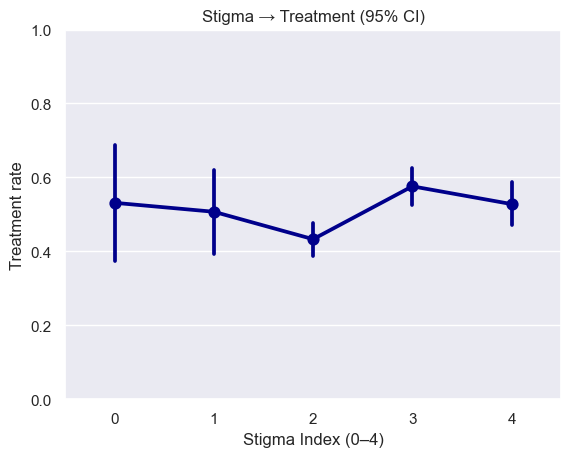

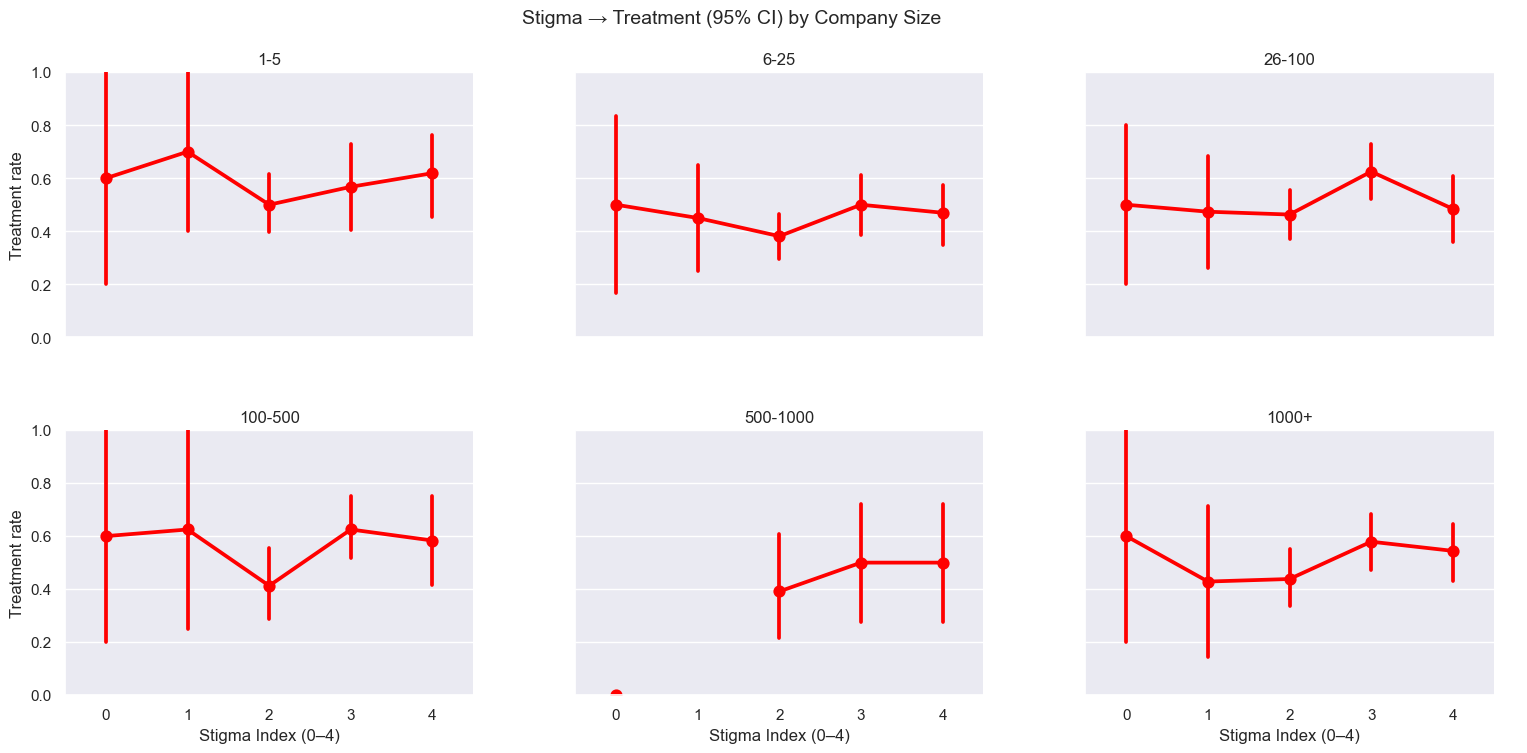

In [3613]:
# Add 0/1 for treatment: `treat_bin` to `df`
df["treat_bin"] = df["treatment"].str.strip().str.casefold().map({"yes":1,"no":0}).astype("Int64")

# 1) Overall: Support → Treatment (95% CI)
ax = sns.pointplot(
    data=df, x="stigma_index", y="treat_bin",
    estimator=np.mean, errorbar=("ci", 95), dodge=False, color="darkblue"
)
ax.set(xlabel="Stigma Index (0–4)", ylabel="Treatment rate", ylim=(0, 1),
       title="Stigma → Treatment (95% CI)")
plt.show()

# 2) Small multiples by company size
g = sns.catplot(
    data=df, x="stigma_index", y="treat_bin",
    col="company_size_cat", col_wrap=3, kind="point",
    estimator=np.mean, errorbar=("ci", 95), dodge=False,
    height=3.5, aspect=1.5, color="red"
)

g.set_axis_labels("Stigma Index (0–4)", "Treatment rate")
g.set(ylim=(0, 1))
g.set_titles(col_template="{col_name}")

fig = g.figure

fig.suptitle("Stigma → Treatment (95% CI) by Company Size", fontsize=14)

fig.tight_layout()
fig.subplots_adjust(bottom=0, top=.89, left=0.08, right=0.98)  # margins
fig.subplots_adjust(wspace=0.25, hspace=0.35) # spacing between facets

plt.show()

In [3614]:
df["leave"].unique() # How easy is it for you to take medical leave for a mental health condition?

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

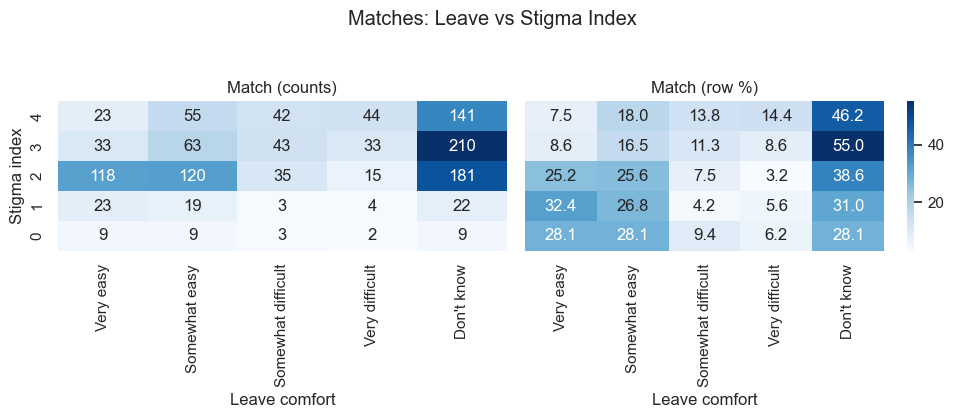

In [3615]:
df["stigma_index"].unique()

df["leave_ord"] = df["leave"].astype(CategoricalDtype(categories={"Very easy":"Very easy", "Somewhat easy":"Somewhat easy", "Somewhat difficult":"Somewhat difficult", "Very difficult":"Very difficult", "Don't know":"Don't know"}))

df["stigma_index_cat"] = df["stigma_index"].astype(CategoricalDtype(categories=[4,3,2,1,0], ordered=True))

crt = pd.crosstab(df["stigma_index_cat"], df["leave_ord"])

crt_pct = crt.div(crt.sum(axis=1).replace(0, np.nan), axis=0) * 100

fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharey=True)

sns.heatmap(crt, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax[0])
ax[0].set_title("Match (counts)")
ax[0].set_xlabel("Leave comfort")
ax[0].set_ylabel("Stigma index")

sns.heatmap(crt_pct.round(1), annot=True, fmt=".1f", cmap="Blues", cbar=True, ax=ax[1])
ax[1].set_title("Match (row %)")
ax[1].set_xlabel("Leave comfort")
ax[1].set_ylabel("")

fig.suptitle("Matches: Leave vs Stigma Index", y=1.04)
fig.tight_layout()
plt.show()


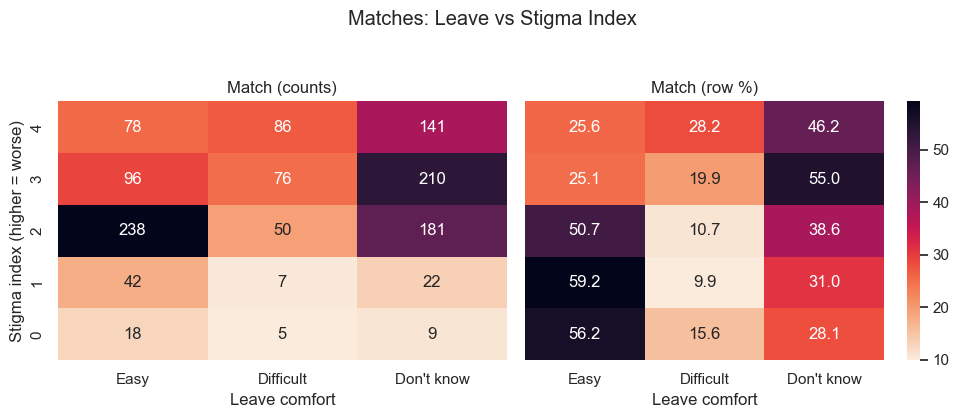

In [3616]:
df["leave_ord2"] = df["leave"].map({"Very easy": "Easy", "Somewhat easy": "Easy", "Somewhat difficult": "Difficult", "Very difficult": "Difficult", "Don't know": "Don't know"})

df["leave_ord2"] = df["leave_ord2"].astype(CategoricalDtype(categories={"Easy":"Easy", "Difficult":"Difficult", "Don't know":"Don't know"}))

df["stigma_index_cat2"] = df["stigma_index"].astype(CategoricalDtype(categories=[4,3,2,1,0], ordered=True))

crt2 = pd.crosstab(df["stigma_index_cat2"], df["leave_ord2"])

crt_pct2 = crt2.div(crt2.sum(axis=1).replace(0, np.nan), axis=0) * 100

fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharey=True)

sns.heatmap(crt2, annot=True, fmt="d", cmap="rocket_r", cbar=False, ax=ax[0])
ax[0].set_title("Match (counts)")
ax[0].set_xlabel("Leave comfort")
ax[0].set_ylabel("Stigma index (higher = worse)")

sns.heatmap(crt_pct2.round(1), annot=True, fmt=".1f", cmap="rocket_r", cbar=True, ax=ax[1])
ax[1].set_title("Match (row %)")
ax[1].set_xlabel("Leave comfort")
ax[1].set_ylabel("")

fig.suptitle("Matches: Leave vs Stigma Index", y=1.04)
fig.tight_layout()
plt.show()

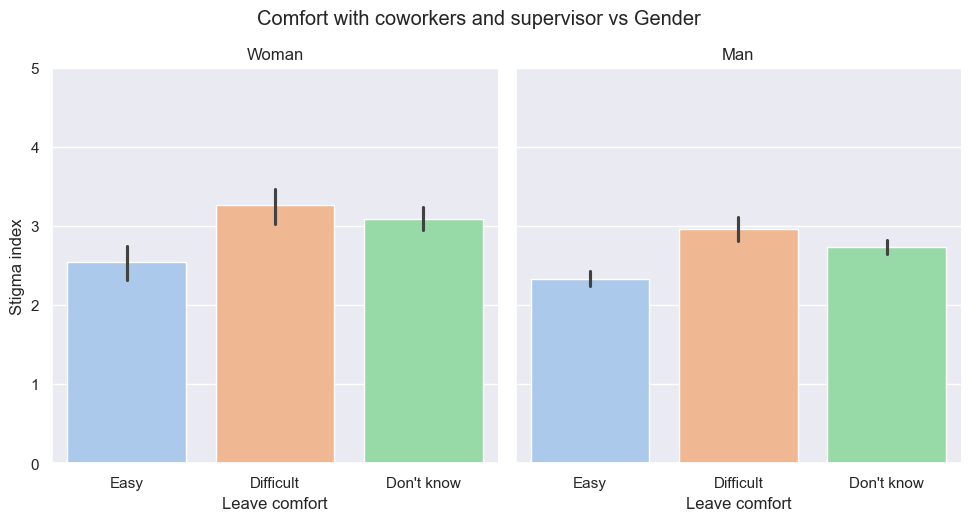

In [3617]:
g = sns.catplot(data=df, x="leave_ord2", y="stigma_index", 
                kind="bar", estimator=np.mean, errorbar=("ci", 95), 
                col= "gender_2", col_order=["Woman", "Man"], palette="pastel", sharey=True, hue="leave_ord2")
g.set(ylim=(0, 5)) 
g.figure.suptitle("Comfort with coworkers and supervisor vs Gender", y=1.04)
g.set_axis_labels("Leave comfort", "Stigma index")
g.set_titles("{col_name}")
plt.show()

In [3618]:
df["leave_ord2"].unique()

['Easy', 'Don't know', 'Difficult']
Categories (3, object): ['Easy', 'Difficult', 'Don't know']



<div class="alert alert-info">
<b>Insight:</b>

* As stigma rises, “Easy” drops.

	* Row % for "Easy" goes from ~56–59% (stigma 0–1) → 50.7% (2) → 25.1% (3) → 25.6% (4).

* “Don’t know” climbs sharply with stigma.

	* 28–31% (0–1) → 38.6% (2) → 55.0% (3) → 46.2% (4).

* High-stigma environments are marked by uncertainty about leave.

* “Difficult” increases at the top end.

	* ~10–16% (0–2) → ~20% (3) → ~28% (4).

Counts (left panel) show most respondents sit at stigma 2–4, while stigma 0–1 are small (so treat those with caution).

</div>


## <span style="color:orange">Question-4: Does treatment seeking behavior differ by age or gender? </span>

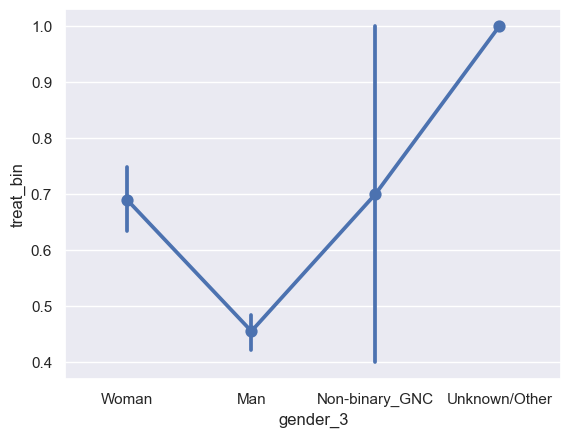

In [3619]:
sns.pointplot(data=df, x="gender_3", y="treat_bin", estimator=np.mean, errorbar=("ci", 95), dodge=False)
plt.show()

In [3620]:
print(df["gender_3"].value_counts(dropna=False))

gender_3
Man               993
Woman             251
Non-binary_GNC     10
Unknown/Other       5
Name: count, dtype: int64


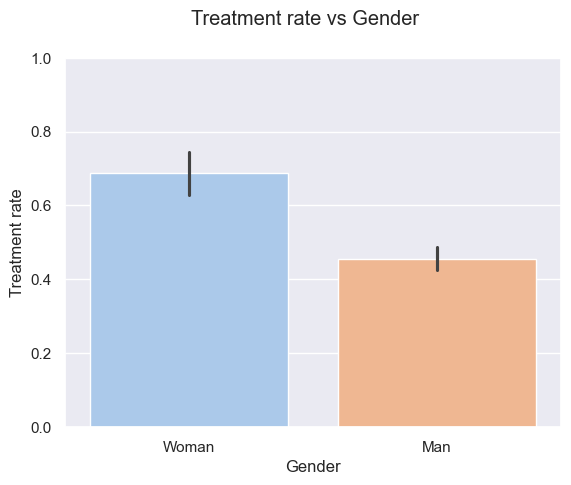

In [3621]:
g = sns.barplot(data=df, x="gender_2", y="treat_bin", estimator=np.mean, errorbar=("ci", 95), dodge=False, palette="pastel", hue="gender_2", legend=False)
g.set(ylim=(0, 1)) 
g.set_xlabel("Gender")
g.set_ylabel("Treatment rate")
g.figure.suptitle("Treatment rate vs Gender")
plt.show()


In [3622]:
import numpy as np
from scipy import stats

# two masks
w_mask = df["gender_2"].eq("Woman")
m_mask = df["gender_2"].eq("Man")

# pull the binary outcome; drop missing, make numeric arrays
g_w = df.loc[w_mask, "treat_bin"].dropna().astype(float).to_numpy()
g_m = df.loc[m_mask, "treat_bin"].dropna().astype(float).to_numpy()

alpha = 0.05

# Welch’s t-test (safer with unequal variances)
t_stat, p_val = stats.ttest_ind(g_w, g_m, equal_var=False)

print(f"n_women={g_w.size}, n_men={g_m.size}")
print(f"mean_women={g_w.mean():.3f}, mean_men={g_m.mean():.3f}, diff={g_w.mean()-g_m.mean():.3f}")
print(f"t={t_stat:.3f}, p={p_val:.6f}")

if p_val < alpha:
    print("Reject H0: groups differ.")
else:
    print("Fail to reject H0: no evidence of a difference.")


n_women=251, n_men=993
mean_women=0.689, mean_men=0.455, diff=0.234
t=7.036, p=0.000000
Reject H0: groups differ.


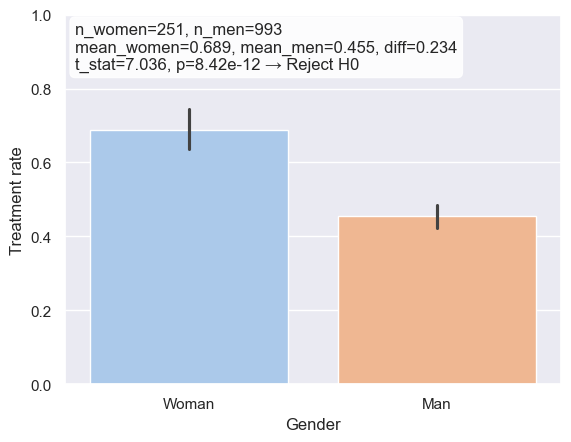

In [3623]:
# barplot of mean treatment rate with 95% CI
g = sns.barplot(data=df, x="gender_2", y="treat_bin",
                 estimator=np.mean, errorbar=("ci", 95), dodge=False, palette="pastel", hue="gender_2", legend=False)
g.set(ylim=(0,1), xlabel="Gender", ylabel="Treatment rate")

# compose one string with newlines
note = (
    f"n_women={g_w.size}, n_men={g_m.size}\n"
    f"mean_women={g_w.mean():.3f}, mean_men={g_m.mean():.3f}, diff={g_w.mean()-g_m.mean():.3f}\n"
    f"t_stat={t_stat:.3f}, p={p_val:.3g} → {'Reject H0' if p_val < 0.05 else 'Fail to reject H0'}"
)

# put it in the top-left of the axes
g.text(0.02, 0.98, note, transform=g.transAxes, ha="left", va="top",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))

plt.show()

In [3624]:
df["age_cat"].value_counts()

age_cat
25–34      707
35–44      320
<25        156
45+         68
Outlier      8
Unknown      0
Name: count, dtype: int64



<div class="alert alert-info">
<b>Insight:</b>

* Women ≈ 0.69 vs Men ≈ 0.46 → Women report treatment at ~20–25 percentage points higher than men.

* Error bars are 95% CIs of the mean. With your large sample (Men n≈993, Women n≈251), that gap is likely statistically meaningful.

</div>

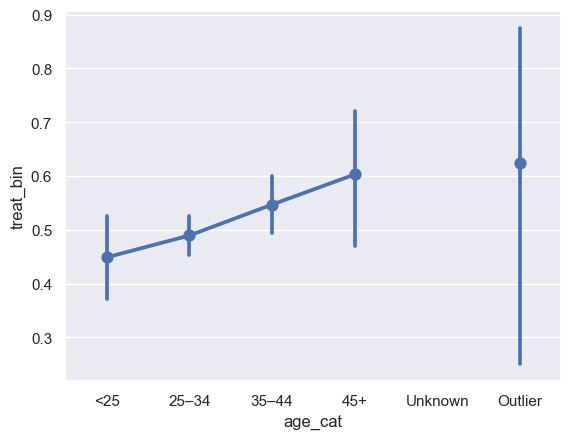

In [3625]:
sns.pointplot(data=df, x="age_cat", y="treat_bin", estimator=np.mean, errorbar=("ci", 95), dodge=False)
plt.show()

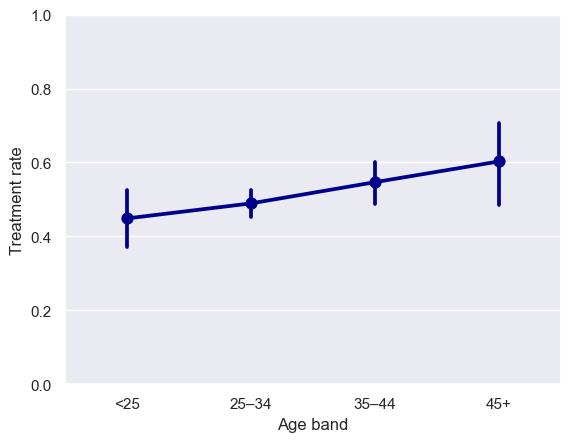

In [3626]:
df["age_cat_2"] = df["age_cat"].where(df["age_cat"].isin(["<25", "25–34", "35–44", "45+"]), pd.NA)

df["age_cat_2"] = df["age_cat_2"].astype(CategoricalDtype(categories=["<25", "25–34", "35–44", "45+"], ordered=True))

g = sns.pointplot(data=df, x="age_cat_2", y="treat_bin", estimator=np.mean, errorbar=("ci", 95), dodge=False, color="darkblue")

g.set(ylim=(0, 1)) 
g.set_xlabel("Age band")
g.set_ylabel("Treatment rate")
plt.show()


<div class="alert alert-info">
<b>Insight:</b>

* monotonic increase: (roughly) <25 ≈ 0.45 → 25–34 ≈ 0.49 → 35–44 ≈ 0.55 → 45+ ≈ 0.60.

* The 45+ CI is wide (n=68), so that estimate is less precise. The middle two groups have overlapping CIs, so their difference may be modest. 

* Older employees are more likely to report having received treatment, with a clear step up from <25 to mid-career, and the highest rate in 45+ (though estimated less precisely). 

</div>

In [3627]:
print(df["age_cat_2"].value_counts())
print(sum(df["age_cat_2"].isna()))

age_cat_2
25–34    707
35–44    320
<25      156
45+       68
Name: count, dtype: int64
8


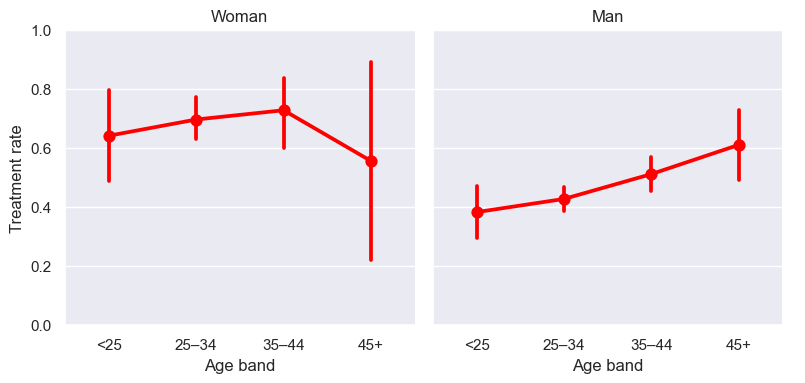

In [3628]:
g = sns.catplot(
    data=df,
    x="age_cat_2", y="treat_bin",
    col="gender_2",
    kind="point",
    estimator=np.mean, errorbar=("ci", 95),
    order=["<25", "25–34", "35–44", "45+"], dodge=False,
    height=4, aspect=1.0, sharey=True, color="red"
)
g.set_axis_labels("Age band", "Treatment rate")
g.set(ylim=(0, 1))  
g.set_titles("{col_name}")
plt.show()

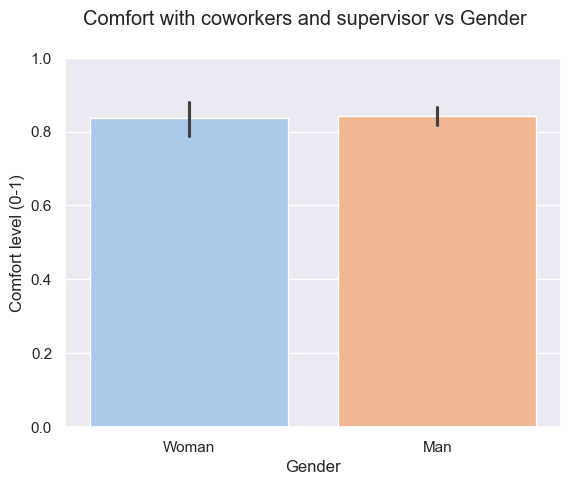

In [3629]:
g = sns.barplot(data=df, x="gender_2", y="comfort_any_bin", estimator=np.mean, errorbar=("ci", 95), dodge=False, palette="pastel", hue="gender_2", legend=False)
g.set(ylim=(0, 1)) 
g.set_xlabel("Gender")
g.set_ylabel("Comfort level (0-1)")
g.figure.suptitle("Comfort with coworkers and supervisor vs Gender")
plt.show()

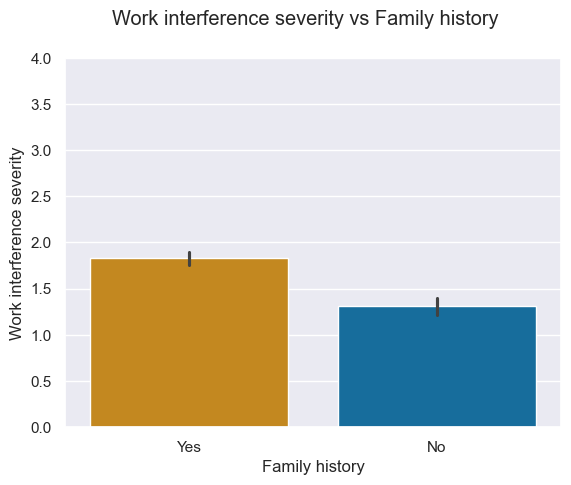

In [3630]:
g = sns.barplot(data=df, x="family_history", y="work_interfere_sev", palette="colorblind", estimator=np.mean, errorbar=("ci", 95), dodge=False, hue="family_history", order=["Yes","No"])
g.set(ylim=(0,4))
g.figure.suptitle("Work interference severity vs Family history")
g.set_xlabel("Family history")
g.set_ylabel("Work interference severity")
plt.show()